# Data Wrangling

In [1]:
# Import required package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os.path
sns.set_style('whitegrid')

In [2]:
# Assign url of file: url
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls'

# Read in all sheets of Excel file and load into xl 
# we skipped the first row because the data had two rows with column labels
xl = pd.read_excel(url, sheet_name=None, skiprows = [0])

In [3]:
#convert the xl OrderedDict to a pandas dataframe
df = pd.DataFrame(xl['Data'])

In [4]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [5]:
#check the dataframe
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
#create a new list of column label to rename the columns of dataframe
new_columns = ['id','limit_balance', 'gender', 'education','marital_status', 'age','status_september','status_august','status_july','status_june','status_may','status_april','balance_september','balance_august','balance_july','balance_june','balance_may','balance_april','paid_september','paid_august','paid_july','paid_june','paid_may','paid_april','default_payment']
#change the column labels
df.columns = new_columns

In [7]:
#to check the column labels
df.head()

,id,limit_balance,gender,education,marital_status,age,status_september,status_august,status_july,status_june,...,balance_june,balance_may,balance_april,paid_september,paid_august,paid_july,paid_june,paid_may,paid_april,default_payment
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [8]:
#to get information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
id                   30000 non-null int64
limit_balance        30000 non-null int64
gender               30000 non-null int64
education            30000 non-null int64
marital_status       30000 non-null int64
age                  30000 non-null int64
status_september     30000 non-null int64
status_august        30000 non-null int64
status_july          30000 non-null int64
status_june          30000 non-null int64
status_may           30000 non-null int64
status_april         30000 non-null int64
balance_september    30000 non-null int64
balance_august       30000 non-null int64
balance_july         30000 non-null int64
balance_june         30000 non-null int64
balance_may          30000 non-null int64
balance_april        30000 non-null int64
paid_september       30000 non-null int64
paid_august          30000 non-null int64
paid_july            30000 non-null int64
paid_june

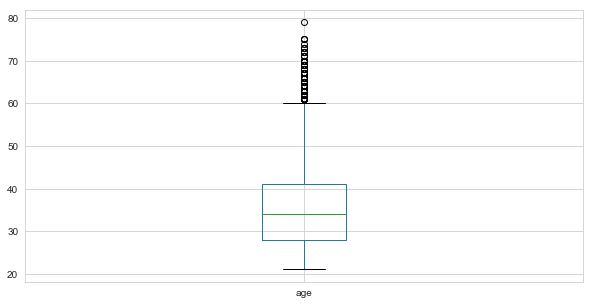

In [9]:
#Using the boxplot to check for outliers
df.boxplot('age',figsize=(10,5))

In [10]:
#Create a list of column labels for different months for balance amount and paid amount
balance = ['balance_september','balance_august','balance_july','balance_june','balance_may','balance_april']
paid = ['paid_september','paid_august','paid_july','paid_june','paid_may','paid_april']

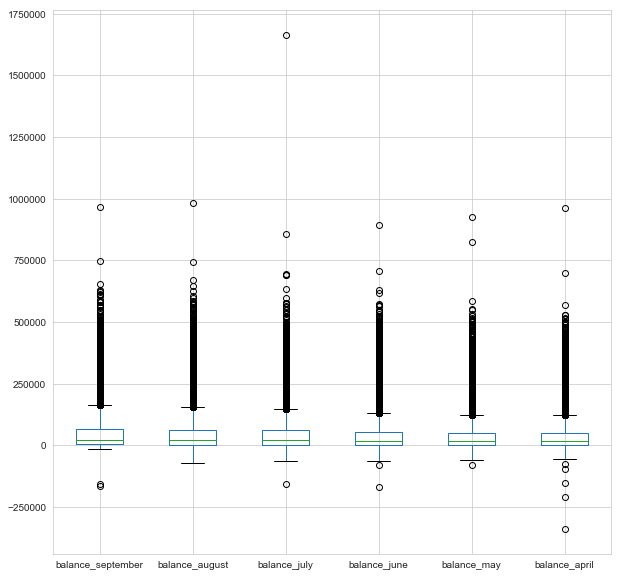

In [11]:
#we can use boxplot to check for outliers from balance columns for each month
df.boxplot(balance, figsize=(10,10))

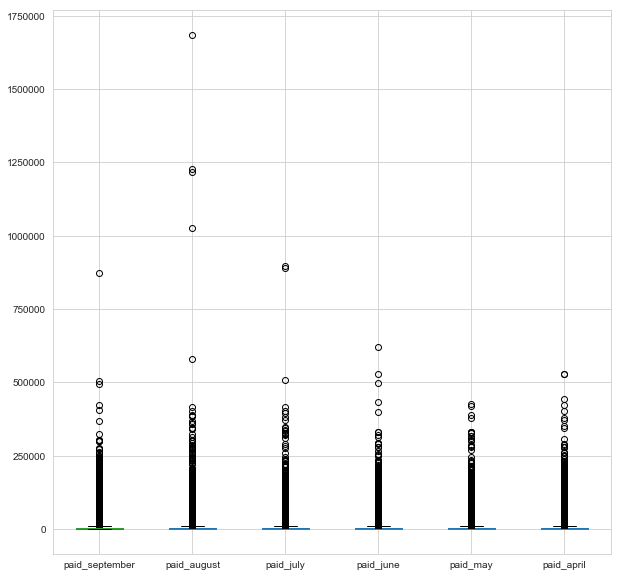

In [12]:
#Draw boxplot to detect outliers from paid column for each month
df.boxplot(paid, figsize=(10,10))

In [13]:
#find min, max, median, 1st and 3rd quartile values for balance column of each month 
df[balance].describe()

,balance_september,balance_august,balance_july,balance_june,balance_may,balance_april
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


In [14]:
#find min, max, median, 1st and 3rd quartile values for paid column of each month
df[paid].describe()

,paid_september,paid_august,paid_july,paid_june,paid_may,paid_april
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


# I created a new dataframe to update and modify bad data plus the outliers values. I   
The bad data are replaced with their best possible values.

The outliers are updated with their closest lower and upper quartile range value.

In [15]:
new_df = df.copy()

In [16]:
#to check for bad data in the education column
new_df[new_df['education']>4]['education'].count()

331

In [17]:
new_df[new_df['education']<1]['education'].count()

14

In [18]:
#to change the bad values 5, 6 and 0 into 4 from education column
for i in new_df[(new_df['education']>4)|(new_df['education']<1)]['education'].index:
    new_df.at[i,'education'] = 4

In [19]:
#to check if there is any bad data in the marital_status column
new_df[(new_df['marital_status']<1)|(new_df['marital_status']>3)]['marital_status'].head()

218     0
809     0
820     0
1019    0
1443    0
Name: marital_status, dtype: int64

In [20]:
#to change the bad value 0 from marital_status column
for i in new_df[new_df['marital_status']==0]['marital_status'].index:
    new_df.at[i,'marital_status'] = 3

In [21]:
#to check if there is any bad data in the status columns, looking at the min and max values
status=['status_september','status_august','status_july','status_june','status_may','status_april']
new_df[status].describe()

,status_september,status_august,status_july,status_june,status_may,status_april
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [22]:
#to check what was the client's status was before it changed to -2
#we can see that the client's pay status was -1 before it changed to -1.
#we will change the value from -2 to -1 
new_df[(new_df['status_september']<-1)|(new_df['status_september']==0)][status]

,status_september,status_august,status_july,status_june,status_may,status_april
2,0,0,0,0,0,0
3,0,0,0,0,0,0
5,0,0,0,0,0,0
6,0,0,0,0,0,0
7,0,-1,-1,0,0,-1
8,0,0,2,0,0,0
9,-2,-2,-2,-2,-1,-1
10,0,0,2,0,0,-1
14,0,0,0,0,0,0
16,0,0,2,2,2,2


In [23]:
#to change the bad values -2 and 0 into -1 from status column
for month in status:
    for i in new_df[(new_df[month]<-1)|(new_df[month]==0)][month].index:
        new_df.at[i,month] = -1

In [24]:
#this for loop will locate the outliers from the dataframe and update those values with their corresponding lower and upper limit
#iterate over the list named balance, which has the balance column labels
for month in balance:
    #calculate 3rd quartile
    q3 = new_df[month].quantile(0.75)
    #calculate 1st quartile
    q1 = new_df[month].quantile(0.25)
    #calculate interquartile range
    iqr = q3-q1
    lower = q1-(1.5*iqr)
    upper = q3+(1.5*iqr)
    lower_index = new_df[new_df[month]<=lower].index
    upper_index = new_df[new_df[month]>=upper].index
    for i in lower_index:
        new_df.at[i,month] = lower
    for i in upper_index:
        new_df.at[i,month] = upper

In [25]:
#check to if the vlaues has been updated
new_df[balance].describe()

,balance_september,balance_august,balance_july,balance_june,balance_may,balance_april
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,44293.450233,42394.537900,40125.555900,36550.997233,33754.083167,32595.032667
std,51294.801146,49266.871502,46699.460373,42751.309326,39895.878481,39367.609047
min,-91739.000000,-69777.000000,-83581.000000,-75942.000000,-70878.000000,-70657.000000
25%,3558.750000,2984.750000,2666.250000,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,20088.500000,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,60164.750000,54506.000000,50190.500000,49198.250000
max,162389.000000,155538.000000,146412.000000,132774.000000,122831.000000,121111.000000


In [26]:
new_df[balance].max()

balance_september    162389
balance_august       155538
balance_july         146412
balance_june         132774
balance_may          122831
balance_april        121111
dtype: int64

In [27]:
new_df[balance].min()

balance_september   -91739
balance_august      -69777
balance_july        -83581
balance_june        -75942
balance_may         -70878
balance_april       -70657
dtype: int64

In [28]:
#this for loop will locate the outliers from the dataframe and update those values with their corresponding lower and upper limit
#iterate over the list named paid, which has the paid column labels
for month in paid:
    #calculate 3rd quartile
    q3 = new_df[month].quantile(0.75)
    #calculate 1st quartile
    q1 = new_df[month].quantile(0.25)
    #calculate interquartile range
    iqr = q3-q1
    lower = q1-(1.5*iqr)
    upper = q3+(1.5*iqr)
    lower_index = new_df[new_df[month]<=lower].index
    upper_index = new_df[new_df[month]>=upper].index
    for i in lower_index:
        new_df.at[i,month] = lower
    for i in upper_index:
        new_df.at[i,month] = upper

In [29]:
#to check the update
new_df[paid].describe()

,paid_september,paid_august,paid_july,paid_june,paid_may,paid_april
count,30000.000000,30000.000000,30000.00000,30000.0000,30000.000000,30000.000000
mean,3496.730800,3422.261733,3035.77460,2718.2836,2731.547167,2714.400900
std,3492.742781,3532.719654,3355.53413,3073.2736,3094.091228,3131.096792
min,0.000000,0.000000,0.00000,0.0000,0.000000,0.000000
25%,1000.000000,833.000000,390.00000,296.0000,252.500000,117.750000
50%,2100.000000,2009.000000,1800.00000,1500.0000,1500.000000,1500.000000
75%,5006.000000,5000.000000,4505.00000,4013.2500,4031.500000,4000.000000
max,11015.000000,11250.000000,10677.00000,9589.0000,9700.000000,9823.000000


In [30]:
new_df[paid].max()

paid_september    11015
paid_august       11250
paid_july         10677
paid_june          9589
paid_may           9700
paid_april         9823
dtype: int64

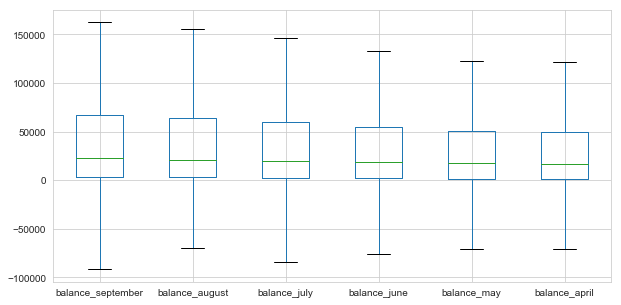

In [31]:
#to check the updated value using boxplot
new_df.boxplot(balance,figsize=(10,5))

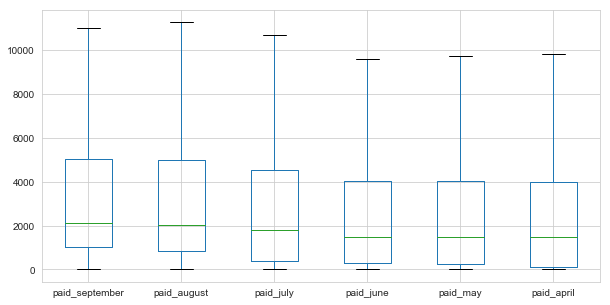

In [32]:
#to check the updated values in those column after dealing with outliers
new_df.boxplot(paid, figsize=(10,5))

# Data Story

In [33]:
#to find out total number of 1 default and 0 non-default 
new_df['default_payment'].value_counts()

0    23364
1     6636
Name: default_payment, dtype: int64

In [34]:
#to calculate the percentage of 1 default and 0 non-default
default_rate = new_df['default_payment'].value_counts() * 100 / len(new_df)
default_rate

0    77.88
1    22.12
Name: default_payment, dtype: float64

# After we wrangled and cleaned the dataset, we started to explore the data in detail. The first step was to see the count and distributions of different variables from the dataset.

# ● How many cardholders are defaulters?
We found that the  77.88% of the cardholders(23,364) did not default and 22.12% of the cardholders (6,636) default.

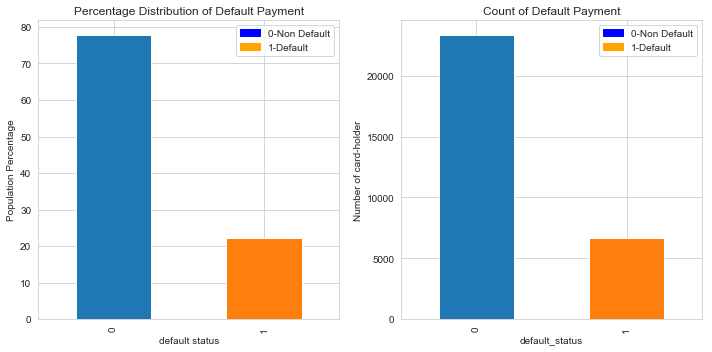

In [35]:
#draw a bar plot to visualize the default payment
import matplotlib.patches as mpatches
plt.subplot(1,2,1)
default_rate.plot(kind='bar',title='Percentage Distribution of Default Payment',figsize=(10,5))
ND = mpatches.Patch(color ='blue', label = '0-Non Default')
DT = mpatches.Patch(color ='orange', label = '1-Default')
plt.legend(handles=[ND, DT], loc=0)
plt.xlabel('default status')
plt.ylabel('Population Percentage')
plt.subplot(1,2,2)
new_df['default_payment'].value_counts().plot(kind='bar',title='Count of Default Payment')
plt.xlabel('default_status')
plt.ylabel('Number of card-holder')
ND = mpatches.Patch(color ='blue', label = '0-Non Default')
DT = mpatches.Patch(color ='orange', label = '1-Default')
plt.legend(handles=[ND, DT], loc=0)
plt.tight_layout()
output_path = os.path.join('/Users/lakpa/Desktop/CapstoneProjectPredictCreditDefault/ClassImbalance/data_visualizations/'+'Default_Payment_distribution.jpg')
plt.savefig(output_path)

In [36]:
#to find out total number of 1 male and 2 female
#there is more 2 female 
new_df['gender'].value_counts()

2    18112
1    11888
Name: gender, dtype: int64

In [37]:
#calculate the gender distribution
gender_rate = new_df['gender'].value_counts() * 100 / len(new_df)
gender_rate

2    60.373333
1    39.626667
Name: gender, dtype: float64

# ● How are the cardholders divided by gender? 
We have 60% female and 40% male clients.

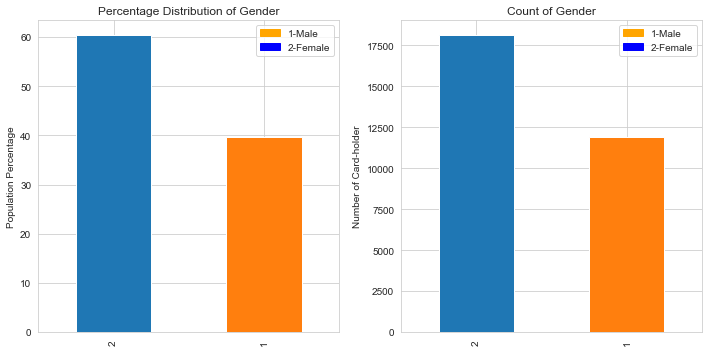

In [38]:
#to calculate the percentage and count of gender
plt.subplot(1,2,1)
#draw a bar plot to see the total number of 1 male and 2 female card holder
gender_rate.plot(kind='bar',title='Percentage Distribution of Gender',figsize=(10,5))
ML = mpatches.Patch(color ='orange', label = '1-Male')
FM = mpatches.Patch(color ='blue', label = '2-Female')
plt.legend(handles=[ML, FM], loc=0)
plt.ylabel('Population Percentage')
plt.subplot(1,2,2)
new_df.gender.value_counts().plot(kind='bar',title='Count of Gender')
ML = mpatches.Patch(color ='orange', label = '1-Male')
FM = mpatches.Patch(color ='blue', label = '2-Female')
plt.legend(handles=[ML, FM], loc=0)
plt.ylabel('Number of Card-holder')
plt.tight_layout()
output_path = os.path.join('/Users/lakpa/Desktop/CapstoneProjectPredictCreditDefault/ClassImbalance/data_visualizations/'+'gender_distribution.jpg')
plt.savefig(output_path)

In [39]:
#to find out the total number of cardholder with different education level
#2 University level is high, and 4 others is low
new_df['education'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: education, dtype: int64

In [40]:
#to calculate the percentage education distribution
education_rate = new_df['education'].value_counts() * 100 / len(new_df)
education_rate

2    46.766667
1    35.283333
3    16.390000
4     1.560000
Name: education, dtype: float64

# ● What are the education level, and Which education level does the most of the cardholders belong to? 
Most of our cardholder have University level education for their highest level of education. We have 35% with Graduate level education, 46% with University level, 16% with High School level, and 1.5% with Others as level of education.

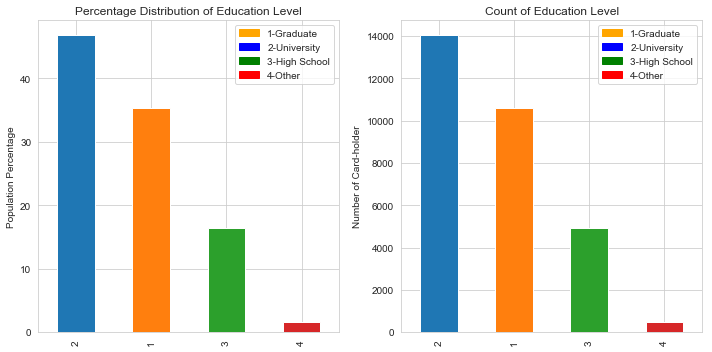

In [41]:
#draw a bar plot to see what education level most of the card holder have
#University level  is the highest
plt.subplot(1,2,1)
education_rate.plot(kind='bar',title='Percentage Distribution of Education Level',figsize=(10,5))
GD = mpatches.Patch(color ='Orange', label = '1-Graduate')
UN = mpatches.Patch(color ='blue', label = '2-University')
HS = mpatches.Patch(color ='green', label = '3-High School')
OT = mpatches.Patch(color ='red', label = '4-Other')
plt.legend(handles=[GD, UN, HS, OT], loc=0)
plt.ylabel('Population Percentage')
plt.subplot(1,2,2)
new_df.education.value_counts().plot(kind='bar',title='Count of Education Level',figsize=(10,5))
GD = mpatches.Patch(color ='Orange', label = '1-Graduate')
UN = mpatches.Patch(color ='blue', label = '2-University')
HS = mpatches.Patch(color ='green', label = '3-High School')
OT = mpatches.Patch(color ='red', label = '4-Other')
plt.legend(handles=[GD, UN, HS, OT], loc=0)
plt.ylabel('Number of Card-holder')
plt.tight_layout()
output_path = os.path.join('/Users/lakpa/Desktop/CapstoneProjectPredictCreditDefault/ClassImbalance/data_visualizations/'+'education_distribution.jpg')
plt.savefig(output_path)

In [42]:
#to find out the count of different martial status,1 married, 2 single, 3 others from the dataset 
#2 i.e single is highest
new_df['marital_status'].value_counts()

2    15964
1    13659
3      377
Name: marital_status, dtype: int64

In [43]:
#to calculate the percentage education distribution
marital_status_rate = new_df['marital_status'].value_counts() * 100 / len(new_df)
marital_status_rate

2    53.213333
1    45.530000
3     1.256667
Name: marital_status, dtype: float64

# ● How many cardholders are married and how many are single?
We have 53% married, 45% single, and rest as others.

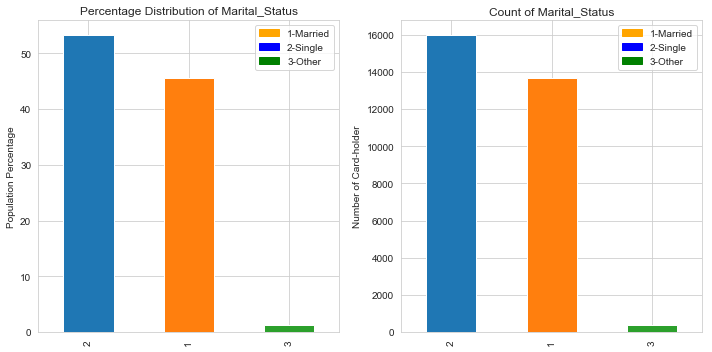

In [44]:
plt.subplot(1,2,1)
#draw a bar plot to see the population of married, single, and others
#single is highest, married is second and others is lowest
marital_status_rate.plot(kind='bar', title='Percentage Distribution of Marital_Status',figsize=(10,5))
MR = mpatches.Patch(color ='orange', label = '1-Married')
SG = mpatches.Patch(color ='blue', label = '2-Single')
O = mpatches.Patch(color ='green', label = '3-Other')
plt.legend(handles=[MR, SG, O], loc=0)
plt.ylabel('Population Percentage')
plt.subplot(1,2,2)
new_df['marital_status'].value_counts().plot(kind='bar', title='Count of Marital_Status',figsize=(10,5))
MR = mpatches.Patch(color ='orange', label = '1-Married')
SG = mpatches.Patch(color ='blue', label = '2-Single')
O = mpatches.Patch(color ='green', label = '3-Other')
plt.legend(handles=[MR, SG, O], loc=0)
plt.ylabel('Number of Card-holder')
plt.tight_layout()
output_path = os.path.join('/Users/lakpa/Desktop/CapstoneProjectPredictCreditDefault/ClassImbalance/data_visualizations/'+'marital_status_distribution.jpg')
plt.savefig(output_path)

# ● What age group is the majority of the cardholders?
Most of our carholders are of age group 20 to 40. This exploration can provide us with the demographic of different variables.

C:\Users\lakpa\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


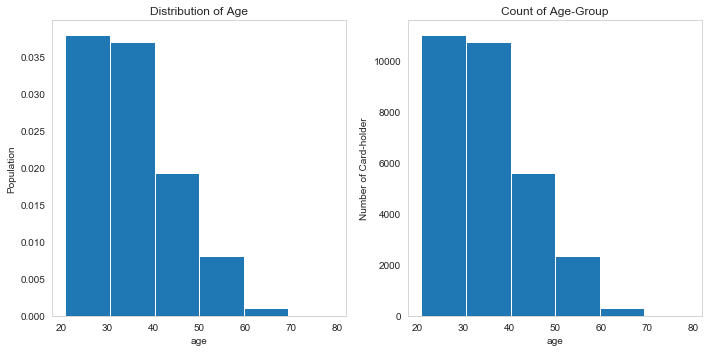

In [45]:
#we can also draw a histogram to see our age group in the dataset
plt.subplot(1,2,1)
new_df['age'].hist(bins=6,figsize=(10,5),normed=1,grid=False)
plt.title('Distribution of Age')
plt.xlabel('age')
plt.ylabel('Population')
plt.subplot(1,2,2)
new_df['age'].hist(bins=6, grid=False)
plt.title('Count of Age-Group')
plt.xlabel('age')
plt.ylabel('Number of Card-holder')
plt.tight_layout()
output_path = os.path.join('/Users/lakpa/Desktop/CapstoneProjectPredictCreditDefault/ClassImbalance/data_visualizations/'+'age_histogram.jpg')
plt.savefig(output_path)

In [46]:
#group the data by gender and find out the default rate
total_defaults = np.sum(new_df['default_payment']==1)
group_gender = new_df.groupby('gender')['default_payment'].sum().reset_index(name='default')
group_gender

,gender,default
0,1,2873
1,2,3763


# The main focus of this project is to create different Machine Learning Models to predict default, so let's find out some insights using different data visualization. We drew barplots to compare different variables with the default cardholders. From each plot, we learned which sub-variable effects default.

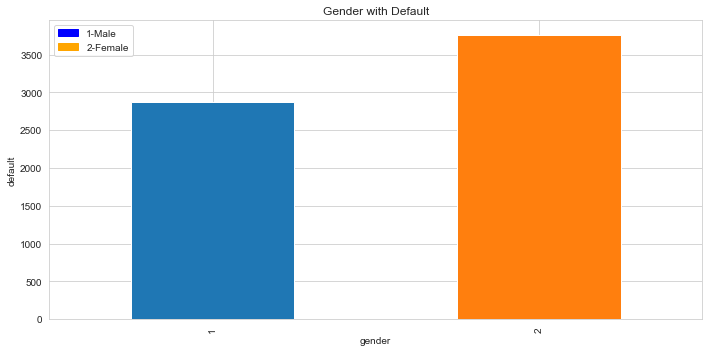

In [47]:
#Now we will commpare default rate with Gender
#it shows that Female is the lowest to default
#married and single both are high in number to default
group_gender.plot(kind='bar',x='gender', y='default',title='Gender with Default',figsize=(10,5))
ML = mpatches.Patch(color ='blue', label = '1-Male')
FM = mpatches.Patch(color ='orange', label = '2-Female')
plt.legend(handles=[ML, FM], loc=0)
plt.ylabel('default')
plt.tight_layout()
output_path = os.path.join('/Users/lakpa/Desktop/CapstoneProjectPredictCreditDefault/ClassImbalance/data_visualizations/'+'gender_default_bar.jpg')
plt.savefig(output_path)

In [48]:
group_education = new_df.groupby(['education'])['default_payment'].sum().reset_index(name='default')
group_education

,education,default
0,1,2036
1,2,3330
2,3,1237
3,4,33


# We found that University level cardholders default more than other education level.

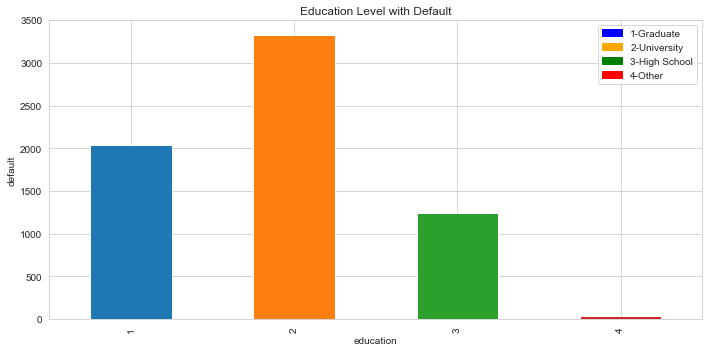

In [49]:
#Now we will commpare default with all marital status
#it shows that others is the lowest to default
#married and single both are high in number to default
group_education.plot(kind='bar',x='education',y='default',figsize=(10,5),title='Education Level with Default')
G = mpatches.Patch(color ='blue', label = '1-Graduate')
U = mpatches.Patch(color ='orange', label = '2-University')
H = mpatches.Patch(color ='green', label = '3-High School')
OT = mpatches.Patch(color ='red', label = '4-Other')
plt.legend(handles=[G, U, H, OT], loc=0)
plt.ylabel('default')
plt.tight_layout()
output_path = os.path.join('/Users/lakpa/Desktop/CapstoneProjectPredictCreditDefault/ClassImbalance/data_visualizations/'+'education_default_bar.jpg')
plt.savefig(output_path)

In [50]:
#group the data by marital_status to see who has maximum default
group_marital = new_df.groupby(['marital_status'])['default_payment'].sum().reset_index(name='default')
group_marital

,marital_status,default
0,1,3206
1,2,3341
2,3,89


# From marital_status with default plot, we found that both married and single have very close number of default, and others have a very low default.

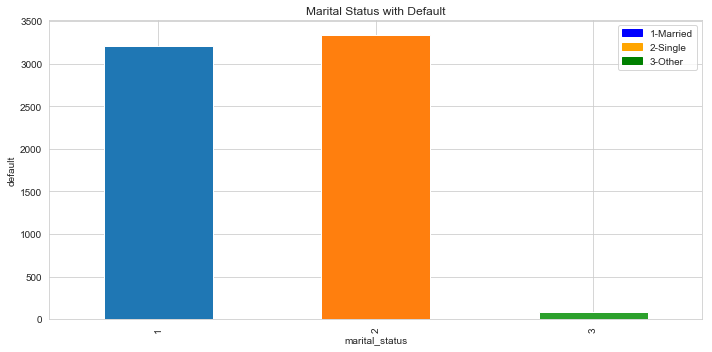

In [51]:
#Now we will commpare default with all marital status
#it shows that others is the lowest to default
#married and single both are high in number to default
group_marital.plot(kind='bar',x='marital_status',y='default',title='Marital Status with Default',figsize=(10,5))
MR = mpatches.Patch(color ='blue', label = '1-Married')
SG = mpatches.Patch(color ='orange', label = '2-Single')
O = mpatches.Patch(color ='green', label = '3-Other')
plt.legend(handles=[MR, SG, O], loc=0)
plt.ylabel('default')
plt.tight_layout()
output_path = os.path.join('/Users/lakpa/Desktop/CapstoneProjectPredictCreditDefault/ClassImbalance/data_visualizations/'+'marital_status_default_bar.jpg')
plt.savefig(output_path)

In [52]:
#to work with age group, create a list of age group to use as a bins
#create a new column with column label 'age_bin'
bins = [20,30,40,50,60,70,80]
new_df['age_bin']= pd.cut(new_df['age'], bins)

In [53]:
#find out the population if different age group
#age group 20 to 30 is the highest, and 30-40 is the second highest
new_df['age_bin'].value_counts()

(20, 30]    11013
(30, 40]    10713
(40, 50]     6005
(50, 60]     1997
(60, 70]      257
(70, 80]       15
Name: age_bin, dtype: int64

In [54]:
#Find the percentage of different age_group
agegroup_rate = new_df['age_bin'].value_counts() * 100 / len(new_df)
agegroup_rate

(20, 30]    36.710000
(30, 40]    35.710000
(40, 50]    20.016667
(50, 60]     6.656667
(60, 70]     0.856667
(70, 80]     0.050000
Name: age_bin, dtype: float64

In [55]:
#now group the data by age_bin
group_age = new_df.groupby('age_bin')['default_payment'].sum().reset_index(name='default')
group_age

,age_bin,default
0,"(20, 30]",2471
1,"(30, 40]",2189
2,"(40, 50]",1399
3,"(50, 60]",504
4,"(60, 70]",68
5,"(70, 80]",5


# Age group with default shows that age group 20 to 30 default more than any other age-group.

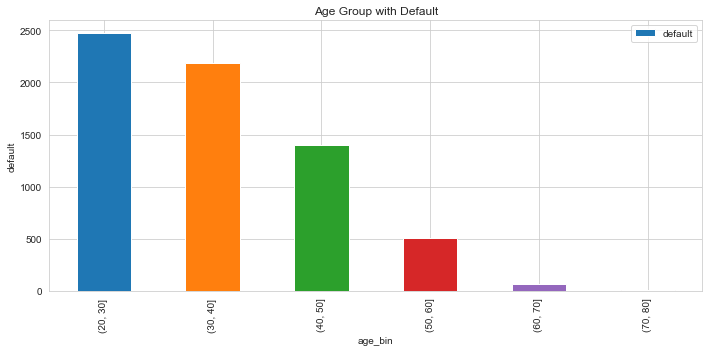

In [56]:
#Now,default_payment with age groups
#more number of age-group(20-30) clients default
group_age.plot(kind='bar',x='age_bin',y='default',title='Age Group with Default',figsize=(10,5))
plt.ylabel('default')
plt.tight_layout()
output_path = os.path.join('/Users/lakpa/Desktop/CapstoneProjectPredictCreditDefault/ClassImbalance/data_visualizations/'+'age_group_default.jpg')
plt.savefig(output_path)

In [57]:
#now group the data by age to find what age is the majority of defaulter
group_age1 = new_df.groupby('age')['default_payment'].sum().reset_index(name='default')
group_age1.sort_values(by="default", ascending=False).head()

,age,default
6,27,313
8,29,313
4,25,302
3,24,300
7,28,286


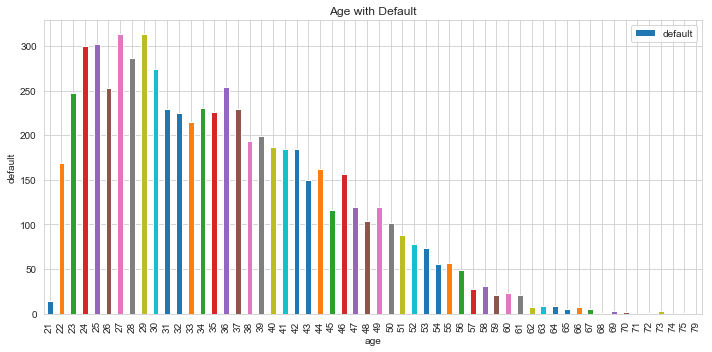

In [58]:
#Now,default_payment with age groups
#more number of age-group(20-30) clients default
group_age1.plot(kind='bar',x='age',y='default',title='Age with Default',figsize=(10,5))
plt.ylabel('default')
plt.tight_layout()
output_path = os.path.join('/Users/lakpa/Desktop/CapstoneProjectPredictCreditDefault/ClassImbalance/data_visualizations/'+'age_default.jpg')
plt.savefig(output_path)

# We found that some cardholders have negative balance. This means that some cardholders are paying the bank more than their balance or some transaction of purchase may have been refunded to the credit card.

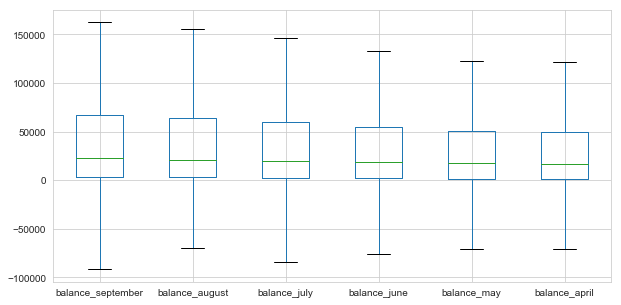

In [59]:
#to check the updated value using boxplot
new_df.boxplot(balance,figsize=(10,5))
output_path = os.path.join('/Users/lakpa/Desktop/CapstoneProjectPredictCreditDefault/ClassImbalance/data_visualizations/'+'balance_box.jpg')
plt.savefig(output_path)

# When we compared balance column with paid column for the month of september, we saw that there is a positive linear relationship between the balance and paid columns except for some balances. Looking at the plot, those balances may be paid by automatic payment every month.

C:\Users\lakpa\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


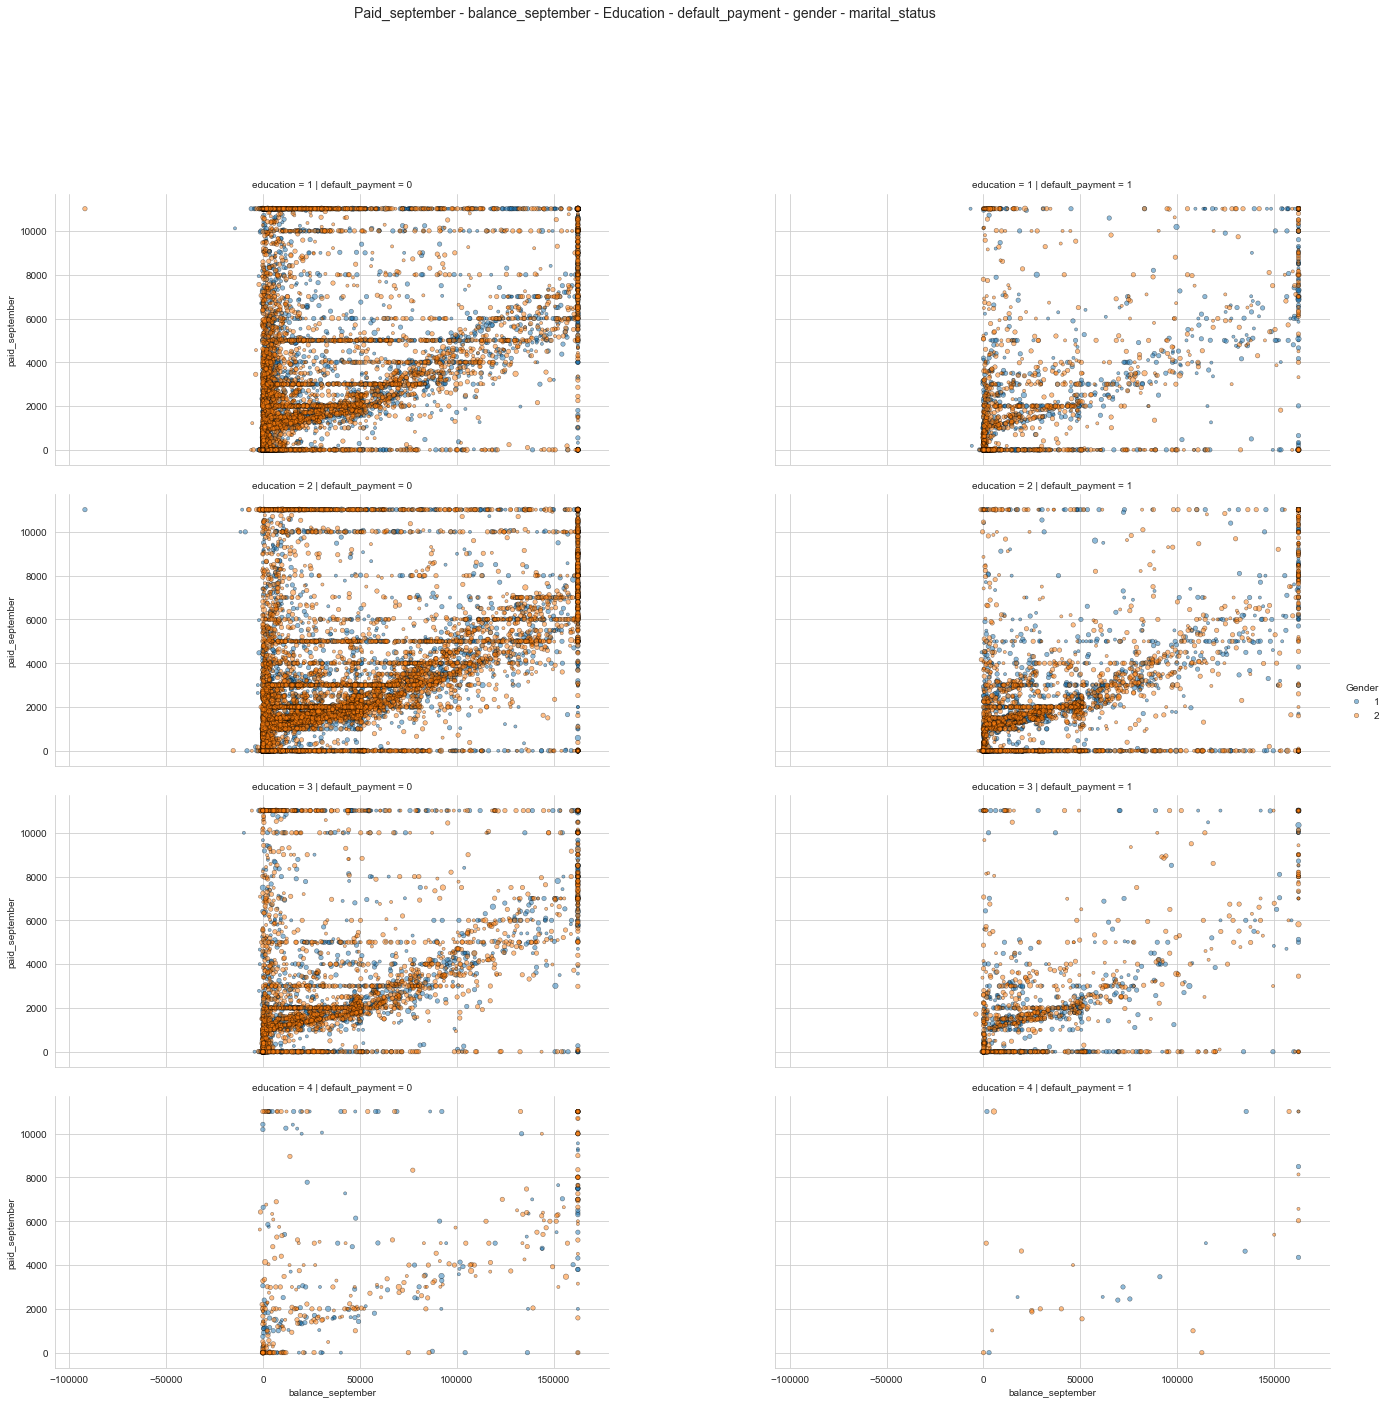

In [60]:
g = sns.FacetGrid(new_df, row='education', col="default_payment", hue='gender', size=4)
g.map(plt.scatter,  "balance_september", "paid_september", alpha=0.5, edgecolor='k', linewidth=0.5, s=new_df['marital_status']*10)
fig = g.fig 
fig.set_size_inches(20, 20)
fig.subplots_adjust(top=0.85, wspace=0.3)
fig.suptitle('Paid_september - balance_september - Education - default_payment - gender - marital_status', fontsize=14)
l = g.add_legend(title='Gender')
output_path = os.path.join('/Users/lakpa/Desktop/CapstoneProjectPredictCreditDefault/ClassImbalance/data_visualizations/'+'paid_balance_scatter.jpg')
plt.savefig(output_path)

In [61]:
#group the data by marital_status and gender to see who has maximum default
group_marital_gender = new_df.groupby(['marital_status','gender'])['default_payment'].sum().reset_index(name='default')
group_marital_gender

,marital_status,gender,default
0,1,1,1346
1,1,2,1860
2,2,1,1485
3,2,2,1856
4,3,1,42
5,3,2,47


# From the analysis and visualizing the dataset, we found that the maximum number of defaulter are female, with University level education, and age between 20 and 30.

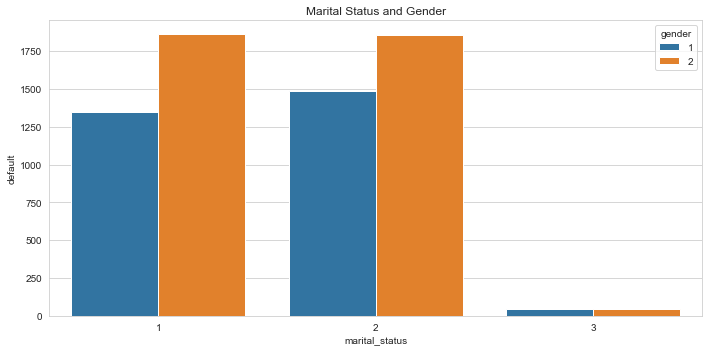

In [62]:
plt.figure(figsize=(10,5))
#draw a barplot to check if female has the higher default rate
sns.barplot(x='marital_status',y='default',hue='gender',data=group_marital_gender)
plt.title('Marital Status and Gender')
plt.tight_layout()
output_path = os.path.join('/Users/lakpa/Desktop/CapstoneProjectPredictCreditDefault/ClassImbalance/data_visualizations/'+'marital_gender_default.jpg')
plt.savefig(output_path)

In [63]:
#now group the data by age_bin and gender
group_age_gender = new_df.groupby(['age_bin','gender'])['default_payment'].sum().reset_index(name='default')
group_age_gender

,age_bin,gender,default
0,"(20, 30]",1,913
1,"(20, 30]",2,1558
2,"(30, 40]",1,1013
3,"(30, 40]",2,1176
4,"(40, 50]",1,648
5,"(40, 50]",2,751
6,"(50, 60]",1,261
7,"(50, 60]",2,243
8,"(60, 70]",1,35
9,"(60, 70]",2,33


# When we compared male and female for each age group with default, we saw that more female of age group 20-30 default more, and both older male and older female after age group 50-80 default less.

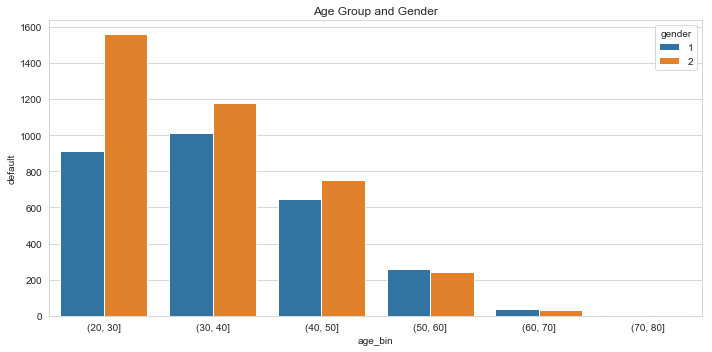

In [64]:
plt.figure(figsize=(10,5))
sns.barplot(x='age_bin',y='default',hue='gender',data=group_age_gender)
plt.title('Age Group and Gender')
plt.tight_layout()
output_path = os.path.join('/Users/lakpa/Desktop/CapstoneProjectPredictCreditDefault/ClassImbalance/data_visualizations/'+'age_group_gender_default.jpg')
plt.savefig(output_path)

In [65]:
group_gender_education = new_df.groupby(['gender','education'])['default_payment'].sum().reset_index(name='default')
group_gender_education.set_index(['gender','education'],inplace=True)
group_gender_education.sort_values('default',ascending=False).head(3)

,,default
gender,education,
2,2,1922
1,2,1408
2,1,1130


# When we group gender and education column, we see that 2,2 or Female with University level education has the maximum default.

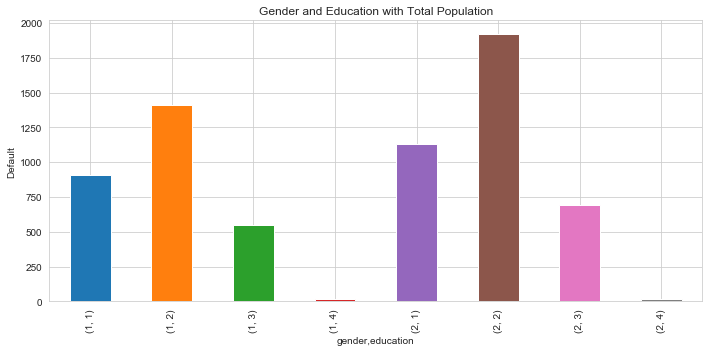

In [66]:
group_gender_education['default'].plot(kind='bar',title='Gender and Education with Total Population',figsize=(10,5))
plt.ylabel('Default')
plt.tight_layout()
output_path = os.path.join('/Users/lakpa/Desktop/CapstoneProjectPredictCreditDefault/ClassImbalance/data_visualizations/'+'gender_education_default.jpg')
plt.savefig(output_path)

In [67]:
group_gender_education_marital = new_df.groupby(['gender','education','marital_status'])['default_payment'].sum().reset_index(name='default')
group_gender_education_marital.set_index(['gender','education','marital_status'],inplace=True)
group_gender_education_marital.sort_values('default',ascending=False).head(3)

default
gender education marital_status         
2      2         1                  1023
                 2                   873
       1         2                   748

# When we compared gender, education and marital status with default, we found that a female, university level, and married cardholder has the maximum default.

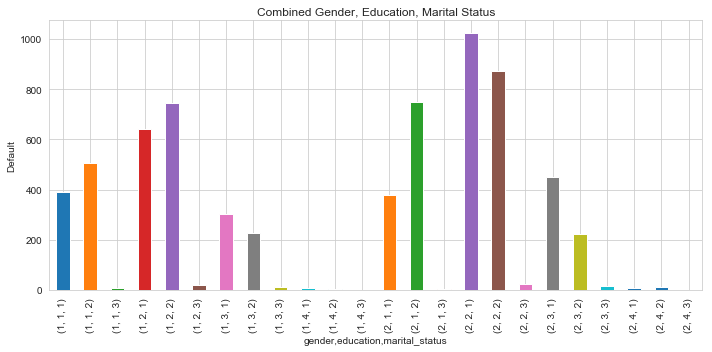

In [68]:
group_gender_education_marital['default'].plot(kind='bar',title='Combined Gender, Education, Marital Status',figsize=(10,5))
plt.ylabel('Default')
plt.tight_layout()
output_path = os.path.join('/Users/lakpa/Desktop/CapstoneProjectPredictCreditDefault/ClassImbalance/data_visualizations/'+'gender_education_marital_default.jpg')
plt.savefig(output_path)

# Inferential statistics

In [69]:
# Create two dataframes: m for male and f for female 
m = new_df[new_df.gender==1]
f = new_df[new_df.gender==2]

In [70]:
#t-statistics
#H0: p(m.default_payment) = p(pop_f.default_payment)
#Ha: p(m.default_payment) != p(pop_f.default_payment)

# calculate the sample mean of male and female sample default_payment
sample_p_m = np.mean(m.default_payment)
sample_p_f = np.mean(f.default_payment)
# calculate the difference of sample mean of male and female
diff_p = sample_p_m - sample_p_f
# calculate the size of sample male and female
n_m = len(m.default_payment)
n_f = len(f.default_payment)
# calculate the variance of male and female
variance_m = np.var(m.default_payment)
variance_f = np.var(f.default_payment)
#Calculate the t-value
t= diff_p / np.sqrt((variance_m/n_m)+(variance_f/n_f))
t

6.850205366131548

In [71]:
#calculate the degree of freedom
dof = n_m + n_f -2
dof

29998

In [72]:
# We assume equal population variance
standard_error = np.sqrt(((n_m-1)*variance_m + (n_f-1)*variance_f) / (n_m+n_f-2))*(np.sqrt((1/n_m)+(1/n_f)))
#the critical t-value is 1.960 for degree of freedom 29998 and alpha 0.05
margin_of_error = 1.96* standard_error
margin_of_error

0.009594833377559193

In [73]:
#Calculate the confidence interval for 95%
conf_int = [diff_p - margin_of_error, diff_p + margin_of_error]
conf_int

[0.02431463199774576, 0.04350429875286414]

In [74]:
from scipy import stats

#calculation p-value for 2-tailed test. 
p_value = stats.t.sf(t, dof)*2
print('p-value is ',p_value)

p-value is  7.516657519184393e-12


The p-value is less than level of significance 0.05, so we reject the null hypothesis. 

In [75]:
# Now, use the bootstrap method
#Bootstrap replicate function to resample data and find mean/std
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

#draw many bootstrap replicates 
def draw_bs_reps(data, func, size=1):
    return np.array([bootstrap_replicate_1d(data, func) for _ in range(size)])

mean_diff = np.mean(m.default_payment) - np.mean(f.default_payment)
#get bootstrap replicates of data sets
bs_replicates_m = draw_bs_reps(m.default_payment, np.mean, size=10000)
bs_replicates_f = draw_bs_reps(f.default_payment, np.mean, size=10000)
#compute replicates of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_m - bs_replicates_f
conf_interval = np.percentile(bs_diff_replicates, [2.5, 97.5])
conf_interval

array([0.0242697 , 0.04356475])

In [76]:
# To find the p-value
combined_mean = np.mean(new_df.default_payment)
#shift the samples
m_shifted = m.default_payment - np.mean(m.default_payment) + combined_mean
f_shifted = f.default_payment - np.mean(f.default_payment) + combined_mean
#get bootstrap replicates of shifted data sets
bs_replicates_m = draw_bs_reps(m_shifted, np.mean, size=10000)
bs_replicates_f = draw_bs_reps(f_shifted, np.mean, size=10000)
#compute replicates of difference of means:
bs_diff_replicates = bs_replicates_m - bs_replicates_f
#compute the p-value
p = np.sum(bs_diff_replicates >= mean_diff) / len(bs_diff_replicates)
p

0.0

'''P-value is less than 0.05, we will reject the null hypothesis. z-score 6.921 is more extreme than the threshold of 1.96, so we will reject the null hypothesis. The gender is one important factor for default payment.

# Chi-squared Test

# For: Gender

H0: Gender and default_payment are independent.

Ha: Gender and default_payment are dependent.  

alpha = 0.05

df = (rows-1)*(columns-1)
df = (2-1) * (2-1)
df = 1

critical chi squared value = 3.84146

In [77]:
chi_squared_test = new_df.groupby(['default_payment','gender']).count()['id'].unstack()
chi_squared_test

gender,1,2
default_payment,,
0,9015,14349
1,2873,3763



                  Gender		Male		    Female		Total

         default_Payment	

                     No		9015		    14349		23364 (0.7788)

            Expected NO	    9258.37	     14105.62
            
                    Yes		2873		    3763		6636 (0.2212)

           Expected Yes	   2629.62          4006.37

                  Total		11888 (0.3963)	18112 (0.6037)	30000

level of significance = 0.05

Chi squared value = (9015-9258.37)squared/9258.37 + (14349-14105.62)squared/14105.62 + (2873-2629.62)squared/2629.62 + (3763-4006.37)squared/4006.37

= 47.90

DF = 1 

In [78]:
from scipy.stats import chisquare

In [79]:
from scipy import stats

In [80]:
observed = [[9015, 14349], [2873, 3763]]
chi2, p, dof, expected = stats.chi2_contingency(observed)
print('chi2:',chi2)
print('DF:',dof)
print('p-value:',p)
print(expected)

chi2: 47.70879689062111
DF: 1
p-value: 4.944678999412044e-12
[[ 9258.3744 14105.6256]
 [ 2629.6256  4006.3744]]


The chi squared statistics is 47.71
P-value is <0.001
The result is significant at p<0.05
We reject the null hypothesis and suggest the alternative hypothesis.
The default_payment is dependent on gender.

# For Education:

H0: Education and default_payment are not related.

Ha: Education and default_payment are related. 

In [81]:
chi_squared_test_education = new_df.groupby(['default_payment','education']).count()['id'].unstack()
chi_squared_test_education

education,1,2,3,4
default_payment,,,,
0,8549,10700,3680,435
1,2036,3330,1237,33


In [82]:
obs = [[8549,10700,3680,435],[2036,3330,1237,33]]
chi2, p, dof, expected = stats.chi2_contingency(obs)
print('chi2:',chi2)
print('DF:',dof)
print('p-value:',p)
print(expected)

chi2: 160.4099510722455
DF: 3
p-value: 1.495064564810615e-34
[[ 8243.598  10926.564   3829.3596   364.4784]
 [ 2341.402   3103.436   1087.6404   103.5216]]


The chi squared test p-value is < 0.001
The result is significant at p < 0.05
We reject the null hypothesis and suggest the alternative hypothesis.
The default_payment is dependent on education. 

# For Marital_status:

H0: Marital_status and default_payment are not related.

Ha: Marital_status and default_payment are related.

In [83]:
chi_squared_test_marital_status = new_df.groupby(['default_payment','marital_status']).count()['id'].unstack()
chi_squared_test_marital_status

marital_status,1,2,3
default_payment,,,
0,10453,12623,288
1,3206,3341,89


In [84]:
obs = [[10453,12623,288],[3206,3341,89]]
chi2, p, dof, expected = stats.chi2_contingency(obs)
print('chi2:',chi2)
print('DF:',dof)
print('p-value:',p)
print(expected)

chi2: 28.130324644821993
DF: 2
p-value: 7.7907203642028e-07
[[10637.6292 12432.7632   293.6076]
 [ 3021.3708  3531.2368    83.3924]]


The chi squared test p-value is < 0.001
The result is significant at p < 0.05
We reject the null hypothesis and suggest the alternative hypothesis.
The default_payment is dependent on marital_status.

 # For Age-group:

H0: Age-group and default_payment are not related.

Ha: Age-group and default_payment are related.

In [85]:
chi_squared_test_age = new_df.groupby(['default_payment','age_bin']).count()['id'].unstack()
chi_squared_test_age

age_bin,"(20, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]","(70, 80]"
default_payment,,,,,,
0,8542,8524,4606,1493,189,10
1,2471,2189,1399,504,68,5


In [86]:
obs = [[8542,8524,4606,1493,189,10],[2471,2189,1399,504,68,5]]
chi2, p, dof, expected = stats.chi2_contingency(obs)
print('chi2:',chi2)
print('DF:',dof)
print('p-value:',p)
print(expected)

chi2: 38.34223794241912
DF: 5
p-value: 3.2206355350202376e-07
[[8.5769244e+03 8.3432844e+03 4.6766940e+03 1.5552636e+03 2.0015160e+02
  1.1682000e+01]
 [2.4360756e+03 2.3697156e+03 1.3283060e+03 4.4173640e+02 5.6848400e+01
  3.3180000e+00]]


The chi squared test p-value is < 0.001
The result is significant at p < 0.05
We reject the null hypothesis and suggest the alternative hypothesis.
The default_payment is dependent on age.

# Machine Learning

Logistic Regression

Decision Tree

Gaussian Naive Bayes Classifier

Random Forest Classifier

Support Vector Machine

In [87]:
#create dummies features for all the categorical columns data
new_df = pd.get_dummies(new_df, columns=['gender','education', 'marital_status'], drop_first=True)

In [88]:
#for status of the client
pay_features = ['status_september','status_august','status_july','status_june', 'status_may','status_april',]
for p in pay_features:
    new_df.loc[new_df[p]<=0, p] = 0
    
new_df = new_df.drop('age_bin', axis=1)

In [89]:
#import necessary packages from scikit learn

#Import LogisticRegression
from sklearn.linear_model import LogisticRegression
#Import DecisionTree
from sklearn.tree import DecisionTreeClassifier
#Import GaussianNB
from sklearn.naive_bayes import GaussianNB
#Import RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier
#Import Support Vector Machine
from sklearn import svm

# import cross_val_score to evaluate the score by cross-validation
from sklearn.model_selection import cross_val_score

# import train_test_split to split data into training and testing set
from sklearn.model_selection import train_test_split
# import different metrics we will use to evaluate the models
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import f1_score
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler, NearMiss, CondensedNearestNeighbour
from imblearn.under_sampling import EditedNearestNeighbours, RepeatedEditedNearestNeighbours, TomekLinks
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.ensemble import BalanceCascade, EasyEnsemble
from sklearn.ensemble import AdaBoostClassifier
import warnings
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from time import time
from scipy.stats import randint as sp_randint

In [90]:
#X is the features/data we use for our model (input data)
X = new_df.drop('default_payment',axis=1)
#scale all our data using robust scaler
robust_scaler = RobustScaler()
X = robust_scaler.fit_transform(X)
#y is the label of our data
y = new_df['default_payment']

In [91]:
#Create a train test split of the data with test size 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123, stratify=y)

Our dataset has class imbalance which needs to be taken cared to build a better model which would not over/underfit when learning for classification. Let us handle class imbalance before we start building different model.

# Taking care of Class Imbalance
Balancing the class weight

Modify the dataset (resampling)

Ensemble methods

In [92]:
#Create a dataframe to hold the recall score from different resampling techniques
resampled_score = pd.DataFrame(columns=['method','recall','precision','f1_score','AUC'])

In [93]:
# Instantiate a logistic regression classifier: logreg
model = LogisticRegression(solver='lbfgs')

# Setup the hyperparameter grid
param_dist = {'C': [0.001,0.01,0.1,1,10,100,1000]}

# Instantiate the RandomizedSearchCV object: logreg_cv
model_cv = RandomizedSearchCV(model, param_distributions=param_dist, cv=5, n_iter=4, random_state=0)

start = time()

# Fit it to the data
model_cv.fit(X_train,y_train)

print('RandomizedSearchCV took %.2f seconds for %d candidates'
      ' parameter settings.' % ((time() - start), model_cv.n_iter))

y_pred_test = model_cv.predict(X_test)

#to calculate the auc score
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
#calculate other metrics scores
accuracy = accuracy_score(y_pred=y_pred_test, y_true=y_test)
precision = precision_score(y_pred=y_pred_test, y_true=y_test)
recall = recall_score(y_pred=y_pred_test,y_true=y_test)
f1score = f1_score(y_true=y_test, y_pred=y_pred_test)

resampled_score = resampled_score.append({'method': 'not resampled','recall':recall,'precision':precision, 'f1_score':f1score, 'AUC':roc_auc}, ignore_index=True)

# Print the tuned parameters and score
print('Tuned Logistic Regression Parameters: {}'.format(model_cv.best_params_))
print('Best score is {0:.4f}'.format(model_cv.best_score_))
print('AUC Score: {0:.4f}'.format(roc_auc))
print('Accuracy Score: {0:.4f}'.format(accuracy))
print('Precision Score: {0:.4f}'.format(precision))
print('Recall Score: {0:.4f}'.format(recall))
print('f1 score: {0:.4f}'.format(f1score))

RandomizedSearchCV took 1.70 seconds for 4 candidates parameter settings.
Tuned Logistic Regression Parameters: {'C': 1000}
Best score is 0.8157
AUC Score: 0.6389
Accuracy Score: 0.8181
Precision Score: 0.6945
Recall Score: 0.3174
f1 score: 0.4357


In [94]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      7009
           1       0.69      0.32      0.44      1991

   micro avg       0.82      0.82      0.82      9000
   macro avg       0.76      0.64      0.66      9000
weighted avg       0.80      0.82      0.79      9000



# Balancing the class weight

In [95]:
# Instantiate a logistic regression classifier: logreg
model = LogisticRegression(class_weight='balanced', solver='lbfgs')

# Setup the hyperparameter grid
param_dist = {'C': [0.001,0.01,0.1,1,10,100,1000]}

# Instantiate the RandomizedSearchCV object: logreg_cv
balanced_model_cv = RandomizedSearchCV(model, param_distributions=param_dist, cv=5, n_iter=4, random_state=0)

start = time()

# Fit it to the data
balanced_model_cv.fit(X_train,y_train)

print('RandomizedSearchCV took %.2f seconds for %d candidates'
      ' parameter settings.' % ((time() - start), model_cv.n_iter))

y_pred_test = balanced_model_cv.predict(X_test)

#to calculate the auc score
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
#calculate other metrics scores
accuracy = accuracy_score(y_pred=y_pred_test, y_true=y_test)
precision = precision_score(y_pred=y_pred_test, y_true=y_test)
recall = recall_score(y_pred=y_pred_test,y_true=y_test)
f1score = f1_score(y_true=y_test, y_pred=y_pred_test)

resampled_score = resampled_score.append({'method': 'Balancing class weight','recall':recall,'precision':precision, 'f1_score':f1score, 'AUC':roc_auc}, ignore_index=True)


# Print the tuned parameters and score
print('Tuned Logistic Regression with Class weight balanced Parameters: {}'.format(balanced_model_cv.best_params_))
print('Best score is {0:.4f}'.format(balanced_model_cv.best_score_))
print('AUC Score: {0:.4f}'.format(roc_auc))
print('Accuracy Score: {0:.4f}'.format(accuracy))
print('Precision Score: {0:.4f}'.format(precision))
print('Recall Score: {0:.4f}'.format(recall))
print('f1 score: {0:.4f}'.format(f1score))

RandomizedSearchCV took 1.50 seconds for 4 candidates parameter settings.
Tuned Logistic Regression with Class weight balanced Parameters: {'C': 0.01}
Best score is 0.7773
AUC Score: 0.7050
Accuracy Score: 0.7799
Precision Score: 0.5022
Recall Score: 0.5706
f1 score: 0.5342


In [96]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.87      0.84      0.86      7009
           1       0.50      0.57      0.53      1991

   micro avg       0.78      0.78      0.78      9000
   macro avg       0.69      0.70      0.70      9000
weighted avg       0.79      0.78      0.78      9000



# Now Undersampling

In [97]:
#Random Undersampling
us = RandomUnderSampler(ratio=0.5, random_state=1)
X_train_res, y_train_res = us.fit_sample(X_train, y_train)

print('Distribution of class labels before resampling {}'.format(Counter(y_train)))
print('Distribution of class labels before resampling {}'.format(Counter(y_train_res)))

clf_base = LogisticRegression(solver='lbfgs')
grid = {'C': 10.0**np.arange(-2,3)}

#cv = KFold(n_splits=5, shuffle=True, random_state=0)
clf = GridSearchCV(clf_base, grid, cv=5, scoring='f1')

clf.fit(X_train_res, y_train_res)

y_pred_test = clf.predict(X_test)
#to calculate the auc score
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
#calculate other metrics scores
accuracy = accuracy_score(y_pred=y_pred_test, y_true=y_test)
precision = precision_score(y_pred=y_pred_test, y_true=y_test)
recall = recall_score(y_pred=y_pred_test,y_true=y_test)
f1score = f1_score(y_true=y_test, y_pred=y_pred_test)

resampled_score = resampled_score.append({'method': 'RandomUnderSampler','recall':recall, 'precision':precision, 'f1_score':f1score, 'AUC':roc_auc}, ignore_index=True)

# Print the tuned parameters and score
print('Tuned Logistic Regression with RandomUnderSampler Parameters: {}'.format(clf.best_params_))
print('Best score is {0:.4f}'.format(clf.best_score_))
print('AUC Score: {0:.4f}'.format(roc_auc))
print('Accuracy Score: {0:.4f}'.format(accuracy))
print('Precision Score: {0:.4f}'.format(precision))
print('Recall Score: {0:.4f}'.format(recall))
print('f1 score: {0:.4f}'.format(f1score))

Distribution of class labels before resampling Counter({0: 16355, 1: 4645})
Distribution of class labels before resampling Counter({0: 9290, 1: 4645})
Tuned Logistic Regression with RandomUnderSampler Parameters: {'C': 1.0}
Best score is 0.5423
AUC Score: 0.6798
Accuracy Score: 0.8183
Precision Score: 0.6307
Recall Score: 0.4314
f1 score: 0.5124


In [98]:
#NEARMISS-1
us = NearMiss(ratio=0.5, version=1, random_state=1)
X_train_res, y_train_res = us.fit_sample(X_train, y_train)

print('Distribution of class labels before resampling {}'.format(Counter(y_train)))
print('Distribution of class labels after resampling {}'.format(Counter(y_train_res)))

clf_base = LogisticRegression(solver='lbfgs')
grid = {'C': 10.0 ** np.arange(-2,3)}

clf = GridSearchCV(clf_base, grid, cv=5, scoring='f1')

clf.fit(X_train_res, y_train_res)

y_pred_test = clf.predict(X_test)

#to calculate the auc score
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
#calculate other metrics scores
accuracy = accuracy_score(y_pred=y_pred_test, y_true=y_test)
precision = precision_score(y_pred=y_pred_test, y_true=y_test)
recall = recall_score(y_pred=y_pred_test,y_true=y_test)
f1score = f1_score(y_true=y_test, y_pred=y_pred_test)

#add the recall score to the dataframe resampled_score
resampled_score = resampled_score.append({'method': 'NearMiss1','recall':recall, 'precision':precision, 'f1_score':f1score, 'AUC':roc_auc}, ignore_index=True)

# Print the tuned parameters and score
print('Tuned Logistic Regression with NearMiss1 Parameters: {}'.format(clf.best_params_))
print('Best score is {0:.4f}'.format(clf.best_score_))
print('AUC Score: {0:.4f}'.format(roc_auc))
print('Accuracy Score: {0:.4f}'.format(accuracy))
print('Precision Score: {0:.4f}'.format(precision))
print('Recall Score: {0:.4f}'.format(recall))
print('f1 score: {0:.4f}'.format(f1score))

Distribution of class labels before resampling Counter({0: 16355, 1: 4645})
Distribution of class labels after resampling Counter({0: 9290, 1: 4645})
Tuned Logistic Regression with NearMiss1 Parameters: {'C': 10.0}
Best score is 0.5773
AUC Score: 0.6563
Accuracy Score: 0.7590
Precision Score: 0.4568
Recall Score: 0.4721
f1 score: 0.4643


In [99]:
#NEARMISS-2
us = NearMiss(ratio=0.5, version=2, random_state=1)
X_train_res, y_train_res = us.fit_sample(X_train, y_train)

print('Distribution of class labels before resampling {}'.format(Counter(y_train)))
print('Distribution of class labels after resampling {}'.format(Counter(y_train_res)))

clf_base = LogisticRegression(solver='lbfgs')
grid = {'C': 10.0 ** np.arange(-2,3)}

clf = GridSearchCV(clf_base, grid, cv=5, scoring='f1')

clf.fit(X_train_res, y_train_res)

y_pred_test = clf.predict(X_test)

#to calculate the auc score
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
#calculate other metrics scores
accuracy = accuracy_score(y_pred=y_pred_test, y_true=y_test)
precision = precision_score(y_pred=y_pred_test, y_true=y_test)
recall = recall_score(y_pred=y_pred_test,y_true=y_test)
f1score = f1_score(y_true=y_test, y_pred=y_pred_test)

#add the recall score to the dataframe resampled_score
resampled_score = resampled_score.append({'method': 'NearMiss2','recall':recall, 'precision':precision,'f1_score':f1score, 'AUC':roc_auc}, ignore_index=True)

# Print the tuned parameters and score
print('Tuned Logistic Regression with NearMiss2 Parameters: {}'.format(clf.best_params_))
print('Best score is {0:.4f}'.format(clf.best_score_))
print('AUC Score: {0:.4f}'.format(roc_auc))
print('Accuracy Score: {0:.4f}'.format(accuracy))
print('Precision Score: {0:.4f}'.format(precision))
print('Recall Score: {0:.4f}'.format(recall))
print('f1 score: {0:.4f}'.format(f1score))

Distribution of class labels before resampling Counter({0: 16355, 1: 4645})
Distribution of class labels after resampling Counter({0: 9290, 1: 4645})
Tuned Logistic Regression with NearMiss2 Parameters: {'C': 1.0}
Best score is 0.4499
AUC Score: 0.6157
Accuracy Score: 0.7509
Precision Score: 0.4277
Recall Score: 0.3732
f1 score: 0.3986


In [100]:
#Edited Nearest Neighbour
us = EditedNearestNeighbours(random_state=0)
X_train_res, y_train_res = us.fit_sample(X_train, y_train)

print('Distribution of class labels before resampling {}'.format(Counter(y_train)))
print('Distribution of class labels after resampling {}'.format(Counter(y_train_res)))

clf_base = LogisticRegression(solver='lbfgs')
grid = {'C': 10.0 ** np.arange(-2,3)}

clf = GridSearchCV(clf_base, grid, cv=5, scoring='f1')

clf.fit(X_train_res, y_train_res)

y_pred_test = clf.predict(X_test)

#to calculate the auc score
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
#calculate other metrics scores
accuracy = accuracy_score(y_pred=y_pred_test, y_true=y_test)
precision = precision_score(y_pred=y_pred_test, y_true=y_test)
recall = recall_score(y_pred=y_pred_test,y_true=y_test)
f1score = f1_score(y_true=y_test, y_pred=y_pred_test)

#add the recall score to the dataframe resampled_score
resampled_score = resampled_score.append({'method': 'EditedNearestNeighbour','recall':recall, 'precision':precision, 'f1_score':f1score, 'AUC':roc_auc}, ignore_index=True)

# Print the tuned parameters and score
print('Tuned Logistic Regression with EditedNearestNeighbours Parameters: {}'.format(clf.best_params_))
print('Best score is {0:.4f}'.format(clf.best_score_))
print('AUC Score: {0:.4f}'.format(roc_auc))
print('Accuracy Score: {0:.4f}'.format(accuracy))
print('Precision Score: {0:.4f}'.format(precision))
print('Recall Score: {0:.4f}'.format(recall))
print('f1 score: {0:.4f}'.format(f1score))

Distribution of class labels before resampling Counter({0: 16355, 1: 4645})
Distribution of class labels after resampling Counter({0: 9910, 1: 4645})
Tuned Logistic Regression with EditedNearestNeighbours Parameters: {'C': 1.0}
Best score is 0.6641
AUC Score: 0.7070
Accuracy Score: 0.7892
Precision Score: 0.5220
Recall Score: 0.5595
f1 score: 0.5401


In [101]:
#Repeated Edited Nearest Neighbour
us = RepeatedEditedNearestNeighbours(random_state=0)
X_train_res, y_train_res = us.fit_sample(X_train, y_train)

print('Distribution of class labels before resampling {}'.format(Counter(y_train)))
print('Distribution of class labels after resampling {}'.format(Counter(y_train_res)))

clf_base = LogisticRegression(solver='lbfgs')
grid = {'C': 10.0 ** np.arange(-2,3)}

clf = GridSearchCV(clf_base, grid, cv=5, scoring='f1')

clf.fit(X_train_res, y_train_res)

y_pred_test = clf.predict(X_test)

#to calculate the auc score
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
#calculate other metrics scores
accuracy = accuracy_score(y_pred=y_pred_test, y_true=y_test)
precision = precision_score(y_pred=y_pred_test, y_true=y_test)
recall = recall_score(y_pred=y_pred_test,y_true=y_test)
f1score = f1_score(y_true=y_test, y_pred=y_pred_test)

#add the recall score to the dataframe resampled_score
resampled_score = resampled_score.append({'method': 'RepeatedEditedNearestNeighbours','recall':recall,'precision':precision,'f1_score':f1score, 'AUC':roc_auc}, ignore_index=True)

# Print the tuned parameters and score
print('Tuned Logistic Regression with RepeatedEditedNearestNeighbours Parameters: {}'.format(clf.best_params_))
print('Best score is {0:.4f}'.format(clf.best_score_))
print('AUC Score: {0:.4f}'.format(roc_auc))
print('Accuracy Score: {0:.4f}'.format(accuracy))
print('Precision Score: {0:.4f}'.format(precision))
print('Recall Score: {0:.4f}'.format(recall))
print('f1 score: {0:.4f}'.format(f1score))

Distribution of class labels before resampling Counter({0: 16355, 1: 4645})
Distribution of class labels after resampling Counter({0: 7079, 1: 4645})
Tuned Logistic Regression with RepeatedEditedNearestNeighbours Parameters: {'C': 10.0}
Best score is 0.7454
AUC Score: 0.7040
Accuracy Score: 0.7477
Precision Score: 0.4495
Recall Score: 0.6258
f1 score: 0.5232


In [102]:
#Tomek Link Removal
us = TomekLinks(random_state=0)
X_train_res, y_train_res = us.fit_sample(X_train, y_train)

print('Distribution of class labels before resampling {}'.format(Counter(y_train)))
print('Distribution of class labels after resampling {}'.format(Counter(y_train_res)))

clf_base = LogisticRegression(solver='lbfgs')
grid = {'C': 10.0 ** np.arange(-2,3)}

clf = GridSearchCV(clf_base, grid, cv=5, scoring='f1')

clf.fit(X_train_res, y_train_res)

y_pred_test = clf.predict(X_test)

#to calculate the auc score
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
#calculate other metrics scores
accuracy = accuracy_score(y_pred=y_pred_test, y_true=y_test)
precision = precision_score(y_pred=y_pred_test, y_true=y_test)
recall = recall_score(y_pred=y_pred_test,y_true=y_test)
f1score = f1_score(y_true=y_test, y_pred=y_pred_test)

#add the recall score to the dataframe resampled_score
resampled_score = resampled_score.append({'method': 'TomekLinks','recall':recall, 'precision':precision, 'f1_score':f1score, 'AUC':roc_auc}, ignore_index=True)

# Print the tuned parameters and score
print('Tuned Logistic Regression with TomekLinks: {}'.format(clf.best_params_))
print('Best score is {0:.4f}'.format(clf.best_score_))
print('AUC Score: {0:.4f}'.format(roc_auc))
print('Accuracy Score: {0:.4f}'.format(accuracy))
print('Precision Score: {0:.4f}'.format(precision))
print('Recall Score: {0:.4f}'.format(recall))
print('f1 score: {0:.4f}'.format(f1score))

Distribution of class labels before resampling Counter({0: 16355, 1: 4645})
Distribution of class labels after resampling Counter({0: 15236, 1: 4645})
Tuned Logistic Regression with TomekLinks: {'C': 10.0}
Best score is 0.4844
AUC Score: 0.6597
Accuracy Score: 0.8217
Precision Score: 0.6780
Recall Score: 0.3692
f1 score: 0.4780


# Oversampling methods

Number of minority class data will increase by copying the data we already have.

In [103]:
#Random Oversampling
os = RandomOverSampler(ratio=0.5,random_state=0)
X_train_res, y_train_res = os.fit_sample(X_train, y_train)

print('Distribution of class labels before resampling {}'.format(Counter(y_train)))
print('Distribution of class labels after resampling {}'.format(Counter(y_train_res)))

clf_base = LogisticRegression(solver='lbfgs')
grid = {'C': 10.0 ** np.arange(-2,3)}

clf = GridSearchCV(clf_base, grid, cv=5, scoring='f1')

clf.fit(X_train_res, y_train_res)

y_pred_test = clf.predict(X_test)

#to calculate the auc score
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
#calculate other metrics scores
accuracy = accuracy_score(y_pred=y_pred_test, y_true=y_test)
precision = precision_score(y_pred=y_pred_test, y_true=y_test)
recall = recall_score(y_pred=y_pred_test,y_true=y_test)
f1score = f1_score(y_true=y_test, y_pred=y_pred_test)

#add the recall score to the dataframe resampled_score
resampled_score = resampled_score.append({'method': 'RandomOverSampler','recall':recall, 'precision':precision, 'f1_score':f1score,'AUC':roc_auc}, ignore_index=True)

# Print the tuned parameters and score
print('Tuned Logistic Regression with RandomOverSampler Parameters: {}'.format(clf.best_params_))
print('Best score is {0:.4f}'.format(clf.best_score_))
print('AUC Score: {0:.4f}'.format(roc_auc))
print('Accuracy Score: {0:.4f}'.format(accuracy))
print('Precision Score: {0:.4f}'.format(precision))
print('Recall Score: {0:.4f}'.format(recall))
print('f1 score: {0:.4f}'.format(f1score))

Distribution of class labels before resampling Counter({0: 16355, 1: 4645})
Distribution of class labels after resampling Counter({0: 16355, 1: 8177})
Tuned Logistic Regression with RandomOverSampler Parameters: {'C': 10.0}
Best score is 0.5373
AUC Score: 0.6806
Accuracy Score: 0.8194
Precision Score: 0.6354
Recall Score: 0.4314
f1 score: 0.5139


In [104]:
#SMOTE
os = SMOTE(ratio=0.5, random_state=0)
X_train_res, y_train_res = os.fit_sample(X_train, y_train)

print('Distribution of class labels before resampling {}'.format(Counter(y_train)))
print('Distribution of class labels after resampling {}'.format(Counter(y_train_res)))

clf_base = LogisticRegression(solver='lbfgs')
grid = {'C': 10.0 ** np.arange(-2,3)}

clf = GridSearchCV(clf_base, grid, cv=5, scoring='f1')

clf.fit(X_train_res, y_train_res)

y_pred_test = clf.predict(X_test)

#to calculate the auc score
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
#calculate other metrics scores
accuracy = accuracy_score(y_pred=y_pred_test, y_true=y_test)
precision = precision_score(y_pred=y_pred_test, y_true=y_test)
recall = recall_score(y_pred=y_pred_test,y_true=y_test)
f1score = f1_score(y_true=y_test, y_pred=y_pred_test)

#add the recall score to the dataframe resampled_score
resampled_score = resampled_score.append({'method': 'SMOTE','recall':recall, 'precision':precision, 'f1_score':f1score, 'AUC':roc_auc}, ignore_index=True)

# Print the tuned parameters and score
print('Tuned Logistic Regression with SMOTE Parameters: {}'.format(clf.best_params_))
print('Best score is {0:.4f}'.format(clf.best_score_))
print('AUC Score: {0:.4f}'.format(roc_auc))
print('Accuracy Score: {0:.4f}'.format(accuracy))
print('Precision Score: {0:.4f}'.format(precision))
print('Recall Score: {0:.4f}'.format(recall))
print('f1 score: {0:.4f}'.format(f1score))

Distribution of class labels before resampling Counter({0: 16355, 1: 4645})
Distribution of class labels after resampling Counter({0: 16355, 1: 8177})
Tuned Logistic Regression with SMOTE Parameters: {'C': 1.0}
Best score is 0.5447
AUC Score: 0.6815
Accuracy Score: 0.8183
Precision Score: 0.6290
Recall Score: 0.4360
f1 score: 0.5150


Ensemble methods for handling class imabalance is combining two methods of handling class imbalance. 

# Combinations
SMOTE + Tomek Link Removal

SMOTE + ENN

In [105]:
#SMOTE + Tomek link removal
os_us = SMOTETomek(ratio=0.5, random_state=0)
X_train_res, y_train_res = os_us.fit_sample(X_train, y_train)

print('Distribution of class labels before resampling {}'.format(Counter(y_train)))
print('Distribution of class labels after resampling {}'.format(Counter(y_train_res)))

clf_base = LogisticRegression(solver='lbfgs')
grid = {'C': 10.0 ** np.arange(-2,3)}

clf = GridSearchCV(clf_base, grid, cv=5, scoring='f1')

clf.fit(X_train_res, y_train_res)

y_pred_test = clf.predict(X_test)

#to calculate the auc score
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
#calculate other metrics scores
accuracy = accuracy_score(y_pred=y_pred_test, y_true=y_test)
precision = precision_score(y_pred=y_pred_test, y_true=y_test)
recall = recall_score(y_pred=y_pred_test,y_true=y_test)
f1score = f1_score(y_true=y_test, y_pred=y_pred_test)

#add the recall score to the dataframe resampled_score
resampled_score = resampled_score.append({'method': 'SMOTETomek','recall':recall, 'precision':precision, 'f1_score':f1score, 'AUC':roc_auc}, ignore_index=True)

# Print the tuned parameters and score
print('Tuned Logistic Regression with SMOTETomek Parameters: {}'.format(clf.best_params_))
print('Best score is {0:.4f}'.format(clf.best_score_))
print('AUC Score: {0:.4f}'.format(roc_auc))
print('Accuracy Score: {0:.4f}'.format(accuracy))
print('Precision Score: {0:.4f}'.format(precision))
print('Recall Score: {0:.4f}'.format(recall))
print('f1 score: {0:.4f}'.format(f1score))

Distribution of class labels before resampling Counter({0: 16355, 1: 4645})
Distribution of class labels after resampling Counter({0: 15832, 1: 7654})
Tuned Logistic Regression with SMOTETomek Parameters: {'C': 10.0}
Best score is 0.5599
AUC Score: 0.6810
Accuracy Score: 0.8184
Precision Score: 0.6300
Recall Score: 0.4345
f1 score: 0.5143


In [106]:
#SMOTE + ENN
os_us = SMOTEENN(ratio=0.5, random_state=0)
X_train_res, y_train_res = os_us.fit_sample(X_train, y_train)

print('Distribution of class labels before resampling {}'.format(Counter(y_train)))
print('Distribution of class labels after resampling {}'.format(Counter(y_train_res)))

clf_base = LogisticRegression(solver='lbfgs')
grid = {'C': 10.0 ** np.arange(-2,3)}

clf = GridSearchCV(clf_base, grid, cv=5, scoring='f1')

clf.fit(X_train_res, y_train_res)

y_pred_test = clf.predict(X_test)

#to calculate the auc score
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
#calculate other metrics scores
accuracy = accuracy_score(y_pred=y_pred_test, y_true=y_test)
precision = precision_score(y_pred=y_pred_test, y_true=y_test)
recall = recall_score(y_pred=y_pred_test,y_true=y_test)
f1score = f1_score(y_true=y_test, y_pred=y_pred_test)

#add the recall score to the dataframe resampled_score
resampled_score = resampled_score.append({'method': 'SMOTEENN','recall':recall, 'precision':precision, 'f1_score':f1score, 'AUC':roc_auc}, ignore_index=True)

# Print the tuned parameters and score
print('Tuned Logistic Regression with SMOTEENN Parameters: {}'.format(clf.best_params_))
print('Best score is {0:.4f}'.format(clf.best_score_))
print('AUC Score: {0:.4f}'.format(roc_auc))
print('Accuracy Score: {0:.4f}'.format(accuracy))
print('Precision Score: {0:.4f}'.format(precision))
print('Recall Score: {0:.4f}'.format(recall))
print('f1 score: {0:.4f}'.format(f1score))

Distribution of class labels before resampling Counter({0: 16355, 1: 4645})
Distribution of class labels after resampling Counter({0: 9217, 1: 3853})
Tuned Logistic Regression with SMOTEENN Parameters: {'C': 100.0}
Best score is 0.7968
AUC Score: 0.7053
Accuracy Score: 0.7972
Precision Score: 0.5418
Recall Score: 0.5404
f1 score: 0.5411


In [107]:
resampled_score.sort_values(by='f1_score', ascending=False)

,method,recall,precision,f1_score,AUC
11,SMOTEENN,0.540432,0.541793,0.541111,0.705299
5,EditedNearestNeighbour,0.559518,0.522024,0.540121,0.706995
1,Balancing class weight,0.570568,0.502210,0.534211,0.704958
6,RepeatedEditedNearestNeighbours,0.625816,0.449495,0.523200,0.704048
9,SMOTE,0.435962,0.628986,0.514981,0.681456
10,SMOTETomek,0.434455,0.630007,0.514269,0.680988
8,RandomOverSampler,0.431441,0.635355,0.513910,0.680552
2,RandomUnderSampler,0.431441,0.630690,0.512377,0.679838
7,TomekLinks,0.369161,0.678044,0.478049,0.659684
3,NearMiss1,0.472125,0.456754,0.464312,0.656308


According to the F1 Score of the classification model, the SMOTE+ENN method to handle the class imbalance performed the best. So we will use SMOTE+ENN to handle class imbalance, then compare different models with each other.

In [108]:
#Preparing a dataframe for model analysis
#Data frame for evaluation metrics
smoteenn_resampled_metrics = pd.DataFrame(index=['roc_auc', 'accuracy','precision','recall','f1'],columns=['LogisticReg','DecisionTree','GaussianNB','RandomForest','SVM'])

# SMOTE+ENN with Logistic Regression

In [109]:
#SMOTE + ENN
os_us = SMOTEENN(ratio=0.5, random_state=0)
X_train_res, y_train_res = os_us.fit_sample(X_train, y_train)

print('Distribution of class labels before resampling {}'.format(Counter(y_train)))
print('Distribution of class labels after resampling {}'.format(Counter(y_train_res)))

clf = LogisticRegression(solver='lbfgs')

clf.fit(X_train_res, y_train_res)

y_pred_test = clf.predict(X_test)

#to calculate the auc score
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
#calculate other metrics scores
accuracy = accuracy_score(y_pred=y_pred_test, y_true=y_test)
precision = precision_score(y_pred=y_pred_test, y_true=y_test)
recall = recall_score(y_pred=y_pred_test,y_true=y_test)
f1score = f1_score(y_true=y_test, y_pred=y_pred_test)

#entering tuned metrics score to the dataframe
smoteenn_resampled_metrics.loc['accuracy','LogisticReg'] = accuracy
smoteenn_resampled_metrics.loc['precision','LogisticReg'] = precision
smoteenn_resampled_metrics.loc['recall','LogisticReg'] = recall
smoteenn_resampled_metrics.loc['roc_auc','LogisticReg'] = roc_auc
smoteenn_resampled_metrics.loc['f1','LogisticReg'] = f1score

# Print different metrics score
print('AUC Score: {0:.4f}'.format(roc_auc))
print('Accuracy Score: {0:.4f}'.format(accuracy))
print('Precision Score: {0:.4f}'.format(precision))
print('Recall Score: {0:.4f}'.format(recall))
print('f1 score: {0:.4f}'.format(f1score))

Distribution of class labels before resampling Counter({0: 16355, 1: 4645})
Distribution of class labels after resampling Counter({0: 9217, 1: 3853})
AUC Score: 0.7053
Accuracy Score: 0.7972
Precision Score: 0.5418
Recall Score: 0.5404
f1 score: 0.5411


# SMOTE+ENN with DecisionTree Classifier

In [110]:
#SMOTE + ENN
clf = DecisionTreeClassifier()

clf.fit(X_train_res, y_train_res)

y_pred_test = clf.predict(X_test)

#to calculate the auc score
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
#calculate other metrics scores
accuracy = accuracy_score(y_pred=y_pred_test, y_true=y_test)
precision = precision_score(y_pred=y_pred_test, y_true=y_test)
recall = recall_score(y_pred=y_pred_test,y_true=y_test)
f1score = f1_score(y_true=y_test, y_pred=y_pred_test)

#entering tuned metrics score to the dataframe
smoteenn_resampled_metrics.loc['accuracy','DecisionTree'] = accuracy
smoteenn_resampled_metrics.loc['precision','DecisionTree'] = precision
smoteenn_resampled_metrics.loc['recall','DecisionTree'] = recall
smoteenn_resampled_metrics.loc['roc_auc','DecisionTree'] = roc_auc
smoteenn_resampled_metrics.loc['f1','DecisionTree'] = f1score

# Print different metrics score
print('AUC Score: {0:.4f}'.format(roc_auc))
print('Accuracy Score: {0:.4f}'.format(accuracy))
print('Precision Score: {0:.4f}'.format(precision))
print('Recall Score: {0:.4f}'.format(recall))
print('f1 score: {0:.4f}'.format(f1score))

AUC Score: 0.6799
Accuracy Score: 0.7686
Precision Score: 0.4788
Recall Score: 0.5208
f1 score: 0.4989


# SMOTE+ENN with GaussianNB

In [111]:
#SMOTE + ENN
clf = GaussianNB()

clf.fit(X_train_res, y_train_res)

y_pred_test = clf.predict(X_test)

#to calculate the auc score
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
#calculate other metrics scores
accuracy = accuracy_score(y_pred=y_pred_test, y_true=y_test)
precision = precision_score(y_pred=y_pred_test, y_true=y_test)
recall = recall_score(y_pred=y_pred_test,y_true=y_test)
f1score = f1_score(y_true=y_test, y_pred=y_pred_test)

#entering tuned metrics score to the dataframe
smoteenn_resampled_metrics.loc['accuracy','GaussianNB'] = accuracy
smoteenn_resampled_metrics.loc['precision','GaussianNB'] = precision
smoteenn_resampled_metrics.loc['recall','GaussianNB'] = recall
smoteenn_resampled_metrics.loc['roc_auc','GaussianNB'] = roc_auc
smoteenn_resampled_metrics.loc['f1','GaussianNB'] = f1score

# Print the different metrics score
print('AUC Score: {0:.4f}'.format(roc_auc))
print('Accuracy Score: {0:.4f}'.format(accuracy))
print('Precision Score: {0:.4f}'.format(precision))
print('Recall Score: {0:.4f}'.format(recall))
print('f1 score: {0:.4f}'.format(f1score))

AUC Score: 0.7043
Accuracy Score: 0.7570
Precision Score: 0.4627
Recall Score: 0.6097
f1 score: 0.5261


# SMOTE+ENN with RandomForestClassifier

In [112]:
#SMOTE + ENN
clf = RandomForestClassifier()

clf.fit(X_train_res, y_train_res)

y_pred_test = clf.predict(X_test)

#to calculate the auc score
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
#calculate other metrics scores
accuracy = accuracy_score(y_pred=y_pred_test, y_true=y_test)
precision = precision_score(y_pred=y_pred_test, y_true=y_test)
recall = recall_score(y_pred=y_pred_test,y_true=y_test)
f1score = f1_score(y_true=y_test, y_pred=y_pred_test)

#entering tuned metrics score to the dataframe
smoteenn_resampled_metrics.loc['accuracy','RandomForest'] = accuracy
smoteenn_resampled_metrics.loc['precision','RandomForest'] = precision
smoteenn_resampled_metrics.loc['recall','RandomForest'] = recall
smoteenn_resampled_metrics.loc['roc_auc','RandomForest'] = roc_auc
smoteenn_resampled_metrics.loc['f1','RandomForest'] = f1score

# Print different metrics score
print('AUC Score: {0:.4f}'.format(roc_auc))
print('Accuracy Score: {0:.4f}'.format(accuracy))
print('Precision Score: {0:.4f}'.format(precision))
print('Recall Score: {0:.4f}'.format(recall))
print('f1 score: {0:.4f}'.format(f1score))

C:\Users\lakpa\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


AUC Score: 0.6948
Accuracy Score: 0.8047
Precision Score: 0.5666
Recall Score: 0.4977
f1 score: 0.5299


# SMOTE+ENN with SVM

In [113]:
#SMOTE + ENN
clf = svm.SVC(kernel='linear')

clf.fit(X_train_res, y_train_res)

y_pred_test = clf.predict(X_test)

#to calculate the auc score
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
#calculate other metrics scores
accuracy = accuracy_score(y_pred=y_pred_test, y_true=y_test)
precision = precision_score(y_pred=y_pred_test, y_true=y_test)
recall = recall_score(y_pred=y_pred_test,y_true=y_test)
f1score = f1_score(y_true=y_test, y_pred=y_pred_test)

#entering tuned metrics score to the dataframe
smoteenn_resampled_metrics.loc['accuracy','SVM'] = accuracy
smoteenn_resampled_metrics.loc['precision','SVM'] = precision
smoteenn_resampled_metrics.loc['recall','SVM'] = recall
smoteenn_resampled_metrics.loc['roc_auc','SVM'] = roc_auc
smoteenn_resampled_metrics.loc['f1','SVM'] = f1score

# Print different metrics score
print('AUC Score: {0:.4f}'.format(roc_auc))
print('Accuracy Score: {0:.4f}'.format(accuracy))
print('Precision Score: {0:.4f}'.format(precision))
print('Recall Score: {0:.4f}'.format(recall))
print('f1 score: {0:.4f}'.format(f1score))

AUC Score: 0.7019
Accuracy Score: 0.7838
Precision Score: 0.5104
Recall Score: 0.5550
f1 score: 0.5318


In [114]:
100*smoteenn_resampled_metrics

,LogisticReg,DecisionTree,GaussianNB,RandomForest,SVM
roc_auc,70.5299,67.9883,70.4287,69.4797,70.1882
accuracy,79.7222,76.8556,75.7,80.4667,78.3778
precision,54.1793,47.8763,46.2652,56.6609,51.0393
recall,54.0432,52.0844,60.9744,49.774,55.4997
f1,54.1111,49.8917,52.6111,52.9947,53.1761


Logistic Regression has the best f1 score compared to all other classification model, so I will choose Logistic Regression for this project. Since the F1-score is significantly better than a random classifier, I would recommend this Logistic Regression model to predict credit card default. Let's try to tune all our model to see if we can improve the performance and then decide which classification model would be the best. 

# Hyperparameter Tuning for model performance improvement

In [115]:
#Preparing a dataframe for model analysis
#Data frame for evaluation metrics
smoteenn_resampled_tuned_metrics = pd.DataFrame(index=['roc_auc', 'accuracy','precision','recall','f1'],columns=['LogisticReg','DecisionTree','GaussianNB','RandomForest','SVM'])

# SMOTE+ENN with Logistic Regression

In [116]:
#SMOTE + ENN
os_us = SMOTEENN(ratio=0.5, random_state=0)
X_train_res, y_train_res = os_us.fit_sample(X_train, y_train)

print('Distribution of class labels before resampling {}'.format(Counter(y_train)))
print('Distribution of class labels after resampling {}'.format(Counter(y_train_res)))

clf_base = LogisticRegression(solver='lbfgs')
grid = {'C': 10.0 ** np.arange(-2,3)}

clf = GridSearchCV(clf_base, grid, cv=5, scoring='f1')

clf.fit(X_train_res, y_train_res)

y_pred_test = clf.predict(X_test)

#to calculate the auc score
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
#calculate other metrics scores
accuracy = accuracy_score(y_pred=y_pred_test, y_true=y_test)
precision = precision_score(y_pred=y_pred_test, y_true=y_test)
recall = recall_score(y_pred=y_pred_test,y_true=y_test)
f1score = f1_score(y_true=y_test, y_pred=y_pred_test)

#entering tuned metrics score to the dataframe
smoteenn_resampled_tuned_metrics.loc['accuracy','LogisticReg'] = accuracy
smoteenn_resampled_tuned_metrics.loc['precision','LogisticReg'] = precision
smoteenn_resampled_tuned_metrics.loc['recall','LogisticReg'] = recall
smoteenn_resampled_tuned_metrics.loc['roc_auc','LogisticReg'] = roc_auc
smoteenn_resampled_tuned_metrics.loc['f1','LogisticReg'] = f1score

# Print the tuned parameters and score
print('Tuned Logistic Regression with SMOTE+ENN Parameters: {}'.format(clf.best_params_))
print('Best score is {0:.4f}'.format(clf.best_score_))
print('AUC Score: {0:.4f}'.format(roc_auc))
print('Accuracy Score: {0:.4f}'.format(accuracy))
print('Precision Score: {0:.4f}'.format(precision))
print('Recall Score: {0:.4f}'.format(recall))
print('f1 score: {0:.4f}'.format(f1score))

Distribution of class labels before resampling Counter({0: 16355, 1: 4645})
Distribution of class labels after resampling Counter({0: 9217, 1: 3853})
Tuned Logistic Regression with SMOTE+ENN Parameters: {'C': 100.0}
Best score is 0.7968
AUC Score: 0.7053
Accuracy Score: 0.7972
Precision Score: 0.5418
Recall Score: 0.5404
f1 score: 0.5411


# SMOTE+ENN with Decision Tree Classifier

In [117]:
clf_base = DecisionTreeClassifier()

# Setup the parameters and distributions to sample from: param_dist
param_grid = {"max_depth": range(1,10),
             'max_features': range(1,10)}

clf = RandomizedSearchCV(clf_base, param_grid, cv=5, n_iter=7, scoring='f1')

clf.fit(X_train_res, y_train_res)

#to store the predicted labels
y_pred_test = clf.predict(X_test)

#to calculate the auc score
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
#calculate other metrics scores
accuracy = accuracy_score(y_pred=y_pred_test, y_true=y_test)
precision = precision_score(y_pred=y_pred_test, y_true=y_test)
recall = recall_score(y_pred=y_pred_test,y_true=y_test)
f1score = f1_score(y_true=y_test, y_pred=y_pred_test)

#entering tuned metrics score to the dataframe
smoteenn_resampled_tuned_metrics.loc['accuracy','DecisionTree'] = accuracy
smoteenn_resampled_tuned_metrics.loc['precision','DecisionTree'] = precision
smoteenn_resampled_tuned_metrics.loc['recall','DecisionTree'] = recall
smoteenn_resampled_tuned_metrics.loc['roc_auc','DecisionTree'] = roc_auc
smoteenn_resampled_tuned_metrics.loc['f1','DecisionTree'] = f1score

# Print the tuned parameters and score
print('Tuned Decision Tree with SMOTE+ENN Parameters: {}'.format(clf.best_params_))
print('Best score is {0:.4f}'.format(clf.best_score_))
print('AUC Score: {0:.4f}'.format(roc_auc))
print('Accuracy Score: {0:.4f}'.format(accuracy))
print('Precision Score: {0:.4f}'.format(precision))
print('Recall Score: {0:.4f}'.format(recall))
print('f1 score: {0:.4f}'.format(f1score))

C:\Users\lakpa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\lakpa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Tuned Decision Tree with SMOTE+ENN Parameters: {'max_features': 9, 'max_depth': 9}
Best score is 0.8068
AUC Score: 0.6789
Accuracy Score: 0.8026
Precision Score: 0.5666
Recall Score: 0.4571
f1 score: 0.5060


# SMOTE+ENN with GaussianNB

In [118]:
clf_base = GaussianNB()

# Setup the parameters and distributions to sample from: param_dist
param_dist = {'priors':[None]}

clf = GridSearchCV(clf_base, param_dist, cv=5, scoring='f1')

clf.fit(X_train_res, y_train_res)

#to store the predicted labels
y_pred_test = clf.predict(X_test)

#to calculate the auc score
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
#calculate other metrics scores
accuracy = accuracy_score(y_pred=y_pred_test, y_true=y_test)
precision = precision_score(y_pred=y_pred_test, y_true=y_test)
recall = recall_score(y_pred=y_pred_test,y_true=y_test)
f1score = f1_score(y_true=y_test, y_pred=y_pred_test)

#entering tuned metrics score to the dataframe
smoteenn_resampled_tuned_metrics.loc['accuracy','GaussianNB'] = accuracy
smoteenn_resampled_tuned_metrics.loc['precision','GaussianNB'] = precision
smoteenn_resampled_tuned_metrics.loc['recall','GaussianNB'] = recall
smoteenn_resampled_tuned_metrics.loc['roc_auc','GaussianNB'] = roc_auc
smoteenn_resampled_tuned_metrics.loc['f1','GaussianNB'] = f1score

# Print the tuned parameters and score
print('Tuned GaussianNB with SMOTE+ENN Parameters: {}'.format(clf.best_params_))
print('Best score is {0:.4f}'.format(clf.best_score_))
print('AUC Score: {0:.4f}'.format(roc_auc))
print('Accuracy Score: {0:.4f}'.format(accuracy))
print('Precision Score: {0:.4f}'.format(precision))
print('Recall Score: {0:.4f}'.format(recall))
print('f1 score: {0:.4f}'.format(f1score))

Tuned GaussianNB with SMOTE+ENN Parameters: {'priors': None}
Best score is 0.7778
AUC Score: 0.7043
Accuracy Score: 0.7570
Precision Score: 0.4627
Recall Score: 0.6097
f1 score: 0.5261


# SMOTE+ENN with Random Forest Classifier

In [119]:
clf_base = RandomForestClassifier()

# Setup the parameters and distributions to sample from: param_dist
param_dist = {'max_depth': range(1,10),
             'max_features': range(1,10),
             'n_estimators': [10,50,100,150,200,250,300,350,400,500]}

clf = RandomizedSearchCV(clf_base, param_dist, cv=5,n_jobs=8, scoring='f1')

clf.fit(X_train_res, y_train_res)

#to store the predicted labels
y_pred_test = clf.predict(X_test)

#to calculate the auc score
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
#calculate other metrics scores
accuracy = accuracy_score(y_pred=y_pred_test, y_true=y_test)
precision = precision_score(y_pred=y_pred_test, y_true=y_test)
recall = recall_score(y_pred=y_pred_test,y_true=y_test)
f1score = f1_score(y_true=y_test, y_pred=y_pred_test)

#entering tuned metrics score to the dataframe
smoteenn_resampled_tuned_metrics.loc['accuracy','RandomForest'] = accuracy
smoteenn_resampled_tuned_metrics.loc['precision','RandomForest'] = precision
smoteenn_resampled_tuned_metrics.loc['recall','RandomForest'] = recall
smoteenn_resampled_tuned_metrics.loc['roc_auc','RandomForest'] = roc_auc
smoteenn_resampled_tuned_metrics.loc['f1','RandomForest'] = f1score

# Print the tuned parameters and score
print('Tuned Random Forest with SMOTE+ENN Parameters: {}'.format(clf.best_params_))
print('Best score is {0:.4f}'.format(clf.best_score_))
print('AUC Score: {0:.4f}'.format(roc_auc))
print('Accuracy Score: {0:.4f}'.format(accuracy))
print('Precision Score: {0:.4f}'.format(precision))
print('Recall Score: {0:.4f}'.format(recall))
print('f1 score: {0:.4f}'.format(f1score))

Tuned Random Forest with SMOTE+ENN Parameters: {'n_estimators': 10, 'max_features': 8, 'max_depth': 8}
Best score is 0.8264
AUC Score: 0.6966
Accuracy Score: 0.8021
Precision Score: 0.5580
Recall Score: 0.5073
f1 score: 0.5314


# SMOTE+ENN with Support Vector Machine

In [120]:
clf_base = svm.SVC(kernel='linear')

# Setup the parameters and distributions to sample from: param_dist
param_dist = {'C': [0.001,0.01,0.1,1], 'gamma': [0.001,0.01,0.1,1]}

clf = RandomizedSearchCV(clf_base, param_dist, cv=5, scoring='f1')

clf.fit(X_train_res, y_train_res)

#to store the predicted labels
y_pred_test = clf.predict(X_test)

#to calculate the auc score
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
#calculate other metrics scores
accuracy = accuracy_score(y_pred=y_pred_test, y_true=y_test)
precision = precision_score(y_pred=y_pred_test, y_true=y_test)
recall = recall_score(y_pred=y_pred_test,y_true=y_test)
f1score = f1_score(y_true=y_test, y_pred=y_pred_test)

#entering tuned metrics score to the dataframe
smoteenn_resampled_tuned_metrics.loc['accuracy','SVM'] = accuracy
smoteenn_resampled_tuned_metrics.loc['precision','SVM'] = precision
smoteenn_resampled_tuned_metrics.loc['recall','SVM'] = recall
smoteenn_resampled_tuned_metrics.loc['roc_auc','SVM'] = roc_auc
smoteenn_resampled_tuned_metrics.loc['f1','SVM'] = f1score

# Print the tuned parameters and score
print('Tuned SVM with SMOTE+ENN Parameters: {}'.format(clf.best_params_))
print('Best score is {0:.4f}'.format(clf.best_score_))
print('AUC Score: {0:.4f}'.format(roc_auc))
print('Accuracy Score: {0:.4f}'.format(accuracy))
print('Precision Score: {0:.4f}'.format(precision))
print('Recall Score: {0:.4f}'.format(recall))
print('f1 score: {0:.4f}'.format(f1score))

Tuned SVM with SMOTE+ENN Parameters: {'gamma': 0.1, 'C': 1}
Best score is 0.7972
AUC Score: 0.7019
Accuracy Score: 0.7838
Precision Score: 0.5104
Recall Score: 0.5550
f1 score: 0.5318


In [121]:
100*smoteenn_resampled_tuned_metrics

,LogisticReg,DecisionTree,GaussianNB,RandomForest,SVM
roc_auc,70.5299,67.8878,70.4287,69.6572,70.1882
accuracy,79.7222,80.2556,75.7,80.2111,78.3778
precision,54.1793,56.6625,46.2652,55.8011,51.0393
recall,54.0432,45.7057,60.9744,50.7283,55.4997
f1,54.1111,50.5977,52.6111,53.1439,53.1761


In [122]:
smoteenn_resampled_tuned_metrics.loc['f1'].max()

0.5411113904953482

In [123]:
100*smoteenn_resampled_metrics

,LogisticReg,DecisionTree,GaussianNB,RandomForest,SVM
roc_auc,70.5299,67.9883,70.4287,69.4797,70.1882
accuracy,79.7222,76.8556,75.7,80.4667,78.3778
precision,54.1793,47.8763,46.2652,56.6609,51.0393
recall,54.0432,52.0844,60.9744,49.774,55.4997
f1,54.1111,49.8917,52.6111,52.9947,53.1761


After tuning the hyperparameter of all different model, we can see that the f1 score for Decision Tree had decreased after hyperparameter tuning, and the f1 score for Random Forest has improved and increased. Logistic Regression, GaussianNB, and SVM has not changed even after tuning. 

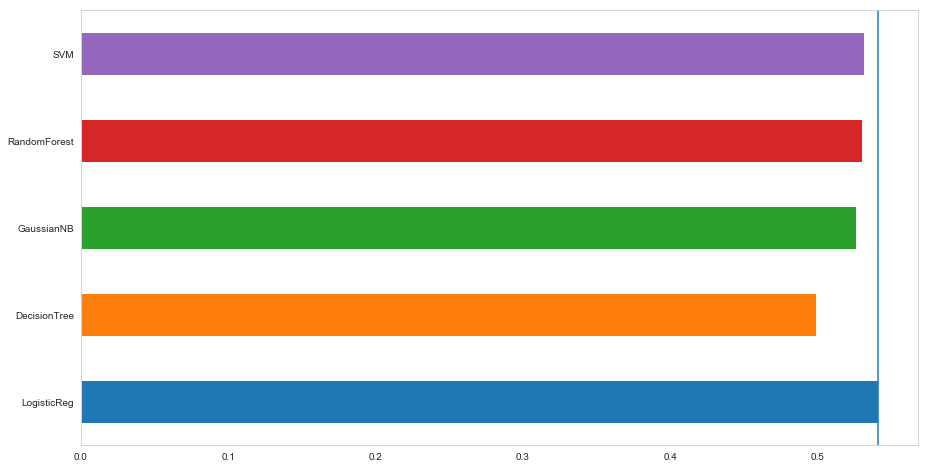

In [124]:
#plot a horizontal bar plot for the metrics of different classifier
fig, ax = plt.subplots(figsize=(15,8))
smoteenn_resampled_metrics.loc['f1'].plot(kind='barh', ax=ax)
ax.axvline(max(smoteenn_resampled_metrics.loc['f1']))
ax.grid()

Logistic Regression has the best f1 score compared to all other classification model, so I will choose Logistic Regression for this project. Since the F1-score is significantly better than a random classifier, I would recommend this Logistic Regression model to predict credit card default. 

In [125]:
#Preparing a dataframe for final model analysis of different approach
final_result = pd.DataFrame(index=['approach1', 'approach2','approach3'],columns=['model', 'f1_score'])

In [126]:
#add the best model with the maximum f1_score for approach 1
final_result.loc['approach1'] = ['logistic_regression', smoteenn_resampled_tuned_metrics.loc['f1'].max()]

In [127]:
final_result.head()

,model,f1_score
approach1,logistic_regression,0.541111
approach2,NaN,NaN
approach3,NaN,NaN


In [128]:
# save the dataframe as csv to use it from another notebook 
final_result.to_csv('final_result1.csv')